<a href="https://colab.research.google.com/github/Serran0Juan/finanzas-trabajo-practico-2025/blob/main/DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------------------------------------------------------------

## **A. Construcción del Dataset**

--------------------------------------------------------------------------------

### *1) Obtención de datos histórico diarios de los ultimos 5 años*

In [69]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)

print(f"Período de análisis: {start_date.strftime('%Y-%m-%d')} a {end_date.strftime('%Y-%m-%d')}")
print(f"Duración: 5 años de datos históricos diarios")

def obtener_datos_financieros(tickers, start_date, end_date, nombre_dataset):
    print(f"\nObteniendo datos para {nombre_dataset}...")
    datos = {}
    resumen = []

    for nombre, ticker in tickers.items():
        try:
            print(f"  • Descargando {nombre} ({ticker})...")
            stock = yf.Ticker(ticker)
            data = stock.history(start=start_date, end=end_date)

            if len(data) > 0:
                datos[nombre] = data
                resumen.append({
                    'Activo': nombre,
                    'Ticker': ticker,
                    'Registros': len(data),
                    'Desde': data.index[0].strftime('%Y-%m-%d'),
                    'Hasta': data.index[-1].strftime('%Y-%m-%d'),
                    'Precio_Inicial': data['Close'].iloc[0],
                    'Precio_Final': data['Close'].iloc[-1],
                    'Status': '✓ OK'
                })
                print(f"    ✓ {len(data)} registros obtenidos")
            else:
                resumen.append({
                    'Activo': nombre,
                    'Ticker': ticker,
                    'Registros': 0,
                    'Status': '✗ Sin datos'
                })
                print(f"    ✗ No se obtuvieron datos para {ticker}")

        except Exception as e:
            resumen.append({
                'Activo': nombre,
                'Ticker': ticker,
                'Registros': 0,
                'Status': f'✗ Error: {str(e)[:30]}...'
            })
            print(f"    ✗ Error al obtener {ticker}: {str(e)}")

    return datos, pd.DataFrame(resumen)

tickers_cartera = {
    'YPF': 'YPF',
    'Pampa Energia': 'PAM',
    'Vista': 'VIST',
    'Ecopetrol': 'EC',
    'Petrobras': 'PBR'
}

datos_cartera, resumen_cartera = obtener_datos_financieros(
    tickers_cartera, start_date, end_date, "CARTERA PRINCIPAL"
)

print("\n" + "="*60)
print("RESUMEN DE DATOS OBTENIDOS")
print("="*60)
print(resumen_cartera.to_string(index=False))

Período de análisis: 2020-08-16 a 2025-08-15
Duración: 5 años de datos históricos diarios

Obteniendo datos para CARTERA PRINCIPAL...
  • Descargando YPF (YPF)...
    ✓ 1255 registros obtenidos
  • Descargando Pampa Energia (PAM)...
    ✓ 1255 registros obtenidos
  • Descargando Vista (VIST)...
    ✓ 1255 registros obtenidos
  • Descargando Ecopetrol (EC)...
    ✓ 1255 registros obtenidos
  • Descargando Petrobras (PBR)...
    ✓ 1255 registros obtenidos

RESUMEN DE DATOS OBTENIDOS
       Activo Ticker  Registros      Desde      Hasta  Precio_Inicial  Precio_Final Status
          YPF    YPF       1255 2020-08-17 2025-08-14        5.440000     32.689999   ✓ OK
Pampa Energia    PAM       1255 2020-08-17 2025-08-14       10.780000     74.279999   ✓ OK
        Vista   VIST       1255 2020-08-17 2025-08-14        3.100000     41.419998   ✓ OK
    Ecopetrol     EC       1255 2020-08-17 2025-08-14        6.268037      8.720000   ✓ OK
    Petrobras    PBR       1255 2020-08-17 2025-08-14      

### *2) Empresas Comparables*




📊 CUADRO COMPARATIVO DE EMPRESAS SELECCIONADAS
------------------------------------------------------------


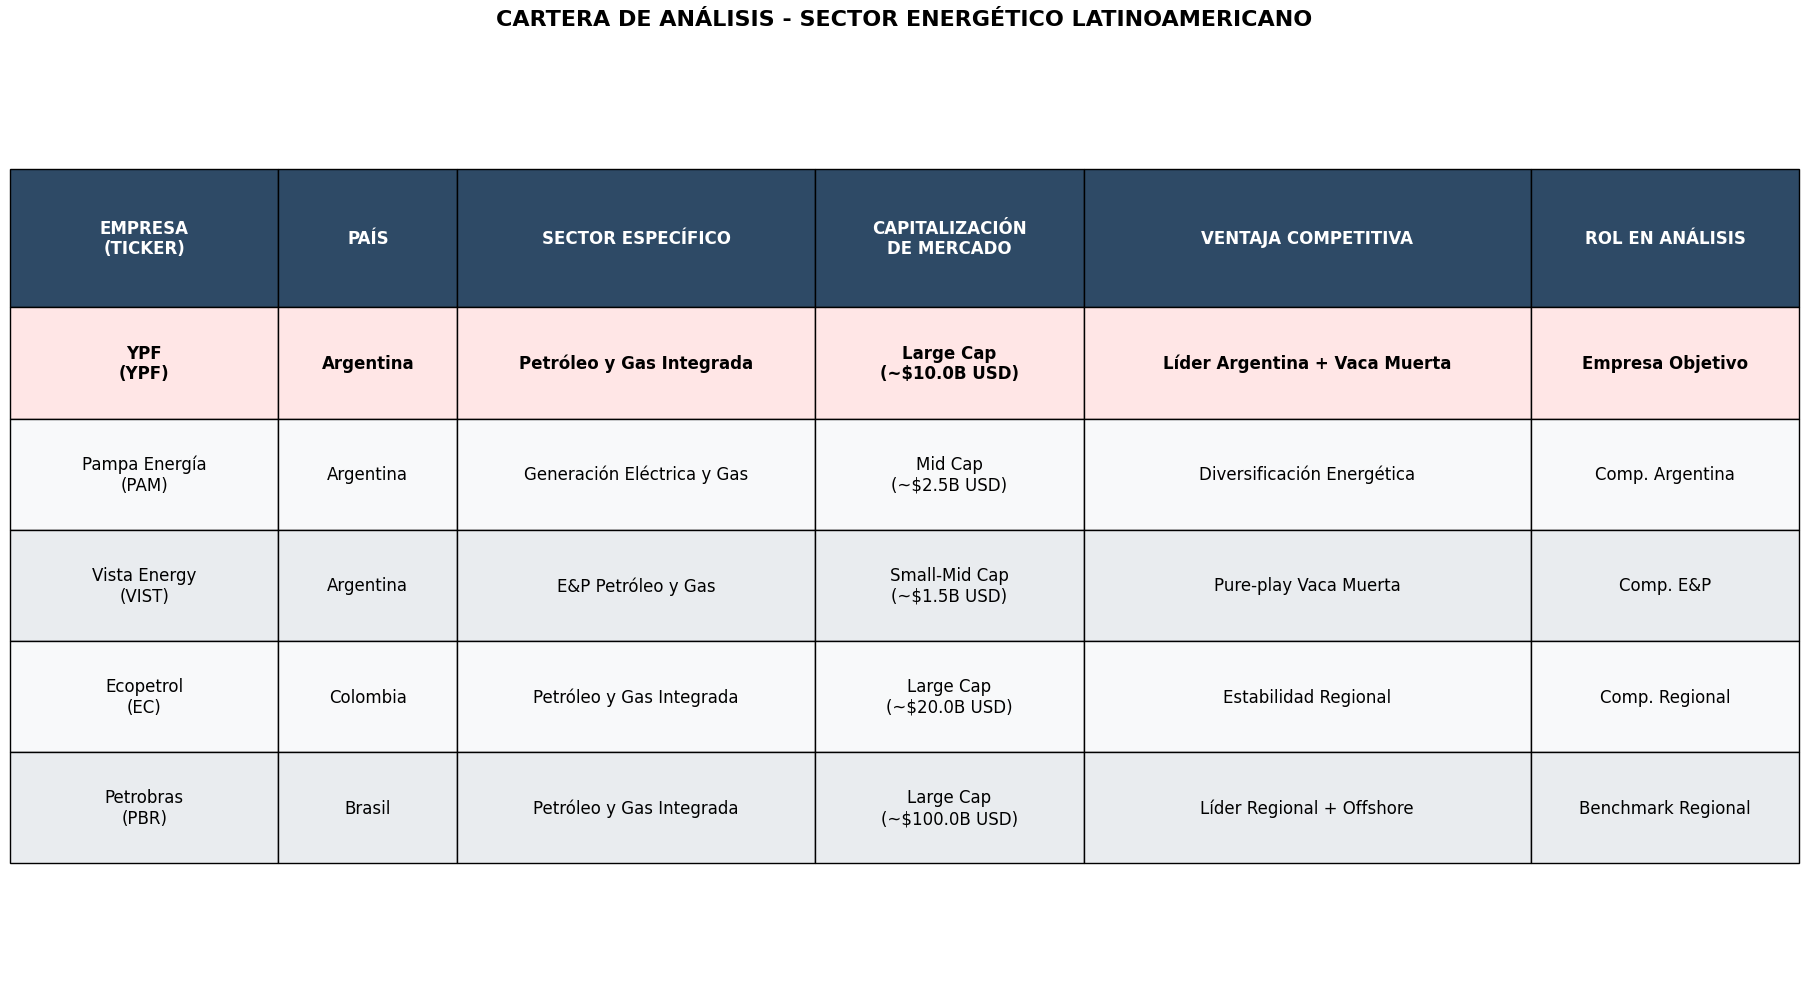

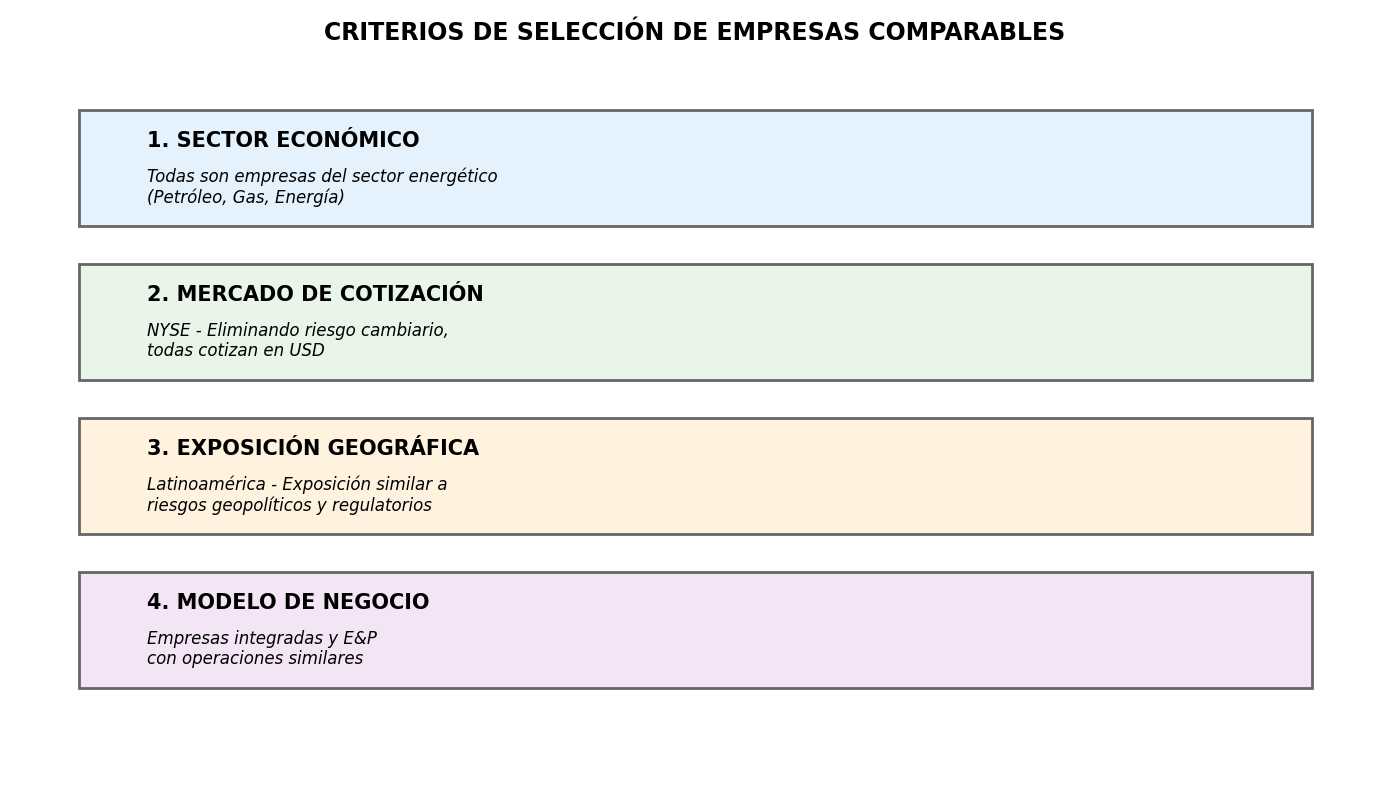

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 10

portfolio = {
    'YPF': 'YPF',
    'PAM': 'PAM',
    'VIST': 'VIST',
    'EC': 'EC',
    'PBR': 'PBR'
}

empresas_data = {
    'Empresa': ['YPF', 'Pampa Energía', 'Vista Energy', 'Ecopetrol', 'Petrobras'],
    'Ticker': ['YPF', 'PAM', 'VIST', 'EC', 'PBR'],
    'País': ['Argentina', 'Argentina', 'Argentina', 'Colombia', 'Brasil'],
    'Sector_Específico': ['Petróleo y Gas Integrada', 'Generación Eléctrica y Gas', 'E&P Petróleo y Gas', 'Petróleo y Gas Integrada', 'Petróleo y Gas Integrada'],
    'Cap_Mercado_Categoria': ['Large Cap', 'Mid Cap', 'Small-Mid Cap', 'Large Cap', 'Large Cap'],
    'Cap_Mercado_USD_B': [10, 2.5, 1.5, 20, 100],
    'Modelo_Negocio': ['Integrada', 'Eléctrica + Gas', 'E&P Puro', 'Integrada', 'Integrada'],
    'Ventaja_Principal': ['Líder Argentina + Vaca Muerta', 'Diversificación Energética', 'Pure-play Vaca Muerta', 'Estabilidad Regional', 'Líder Regional + Offshore'],
    'Rol_Análisis': ['Empresa Objetivo', 'Comp. Argentina', 'Comp. E&P', 'Comp. Regional', 'Benchmark Regional']
}

df_empresas = pd.DataFrame(empresas_data)

justificacion_detallada = {
    'YPF (YPF)': {
        'descripcion': 'Empresa principal - Líder integrada de energía en Argentina',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$8-12B USD)',
        'ventaja': 'Líder en Argentina, operaciones Vaca Muerta',
        'justificacion': 'Empresa objetivo del análisis'
    },
    'Pampa Energía (PAM)': {
        'descripcion': 'Empresa energética integrada argentina (ADR)',
        'sector': 'Energía - Generación Eléctrica y Gas',
        'mercado': 'NYSE',
        'cap_mercado': 'Mid Cap (~$2-3B USD)',
        'ventaja': 'Diversificación energética, mismo país',
        'justificacion': 'Misma exposición al riesgo argentino, sector energético complementario'
    },
    'Vista Energy (VIST)': {
        'descripcion': 'Empresa de E&P enfocada en Vaca Muerta',
        'sector': 'Energía - E&P Petróleo y Gas',
        'mercado': 'NYSE',
        'cap_mercado': 'Small-Mid Cap (~$1-2B USD)',
        'ventaja': 'Pure-play Vaca Muerta, tecnología avanzada',
        'justificacion': 'Mismo play geológico que YPF, modelo E&P puro'
    },
    'Ecopetrol (EC)': {
        'descripcion': 'Empresa petrolera integrada de Colombia (ADR)',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$15-25B USD)',
        'ventaja': 'Modelo integrado, mercado latinoamericano estable',
        'justificacion': 'Comparable regional LatAm, modelo de negocio similar'
    },
    'Petrobras (PBR)': {
        'descripcion': 'Empresa petrolera integrada de Brasil (ADR)',
        'sector': 'Energía - Petróleo y Gas Integrada',
        'mercado': 'NYSE',
        'cap_mercado': 'Large Cap (~$80-120B USD)',
        'ventaja': 'Líder regional, offshore expertise, dividendos',
        'justificacion': 'Benchmak regional, escala de operaciones, modelo integrado'
    }
}

print("\n\n📊 CUADRO COMPARATIVO DE EMPRESAS SELECCIONADAS")
print("-" * 60)

def crear_tabla_principal():
    tabla_data = []
    for i in range(len(df_empresas)):
        row = df_empresas.iloc[i]
        tabla_data.append([
            f"{row['Empresa']}\n({row['Ticker']})",
            row['País'],
            row['Sector_Específico'],
            f"{row['Cap_Mercado_Categoria']}\n(~${row['Cap_Mercado_USD_B']}B USD)",
            row['Ventaja_Principal'],
            row['Rol_Análisis']
        ])

    fig, ax = plt.subplots(figsize=(18, 10))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(
        cellText=tabla_data,
        colLabels=['EMPRESA\n(TICKER)', 'PAÍS', 'SECTOR ESPECÍFICO', 'CAPITALIZACIÓN\nDE MERCADO', 'VENTAJA COMPETITIVA', 'ROL EN ANÁLISIS'],
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.1, 0.2, 0.15, 0.25, 0.15]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 3)

    for i in range(len(tabla_data[0])):
        table[(0, i)].set_facecolor('#2E4A66')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.15)

    colors = ['#F8F9FA', '#E9ECEF']
    for i in range(1, len(tabla_data) + 1):
        for j in range(len(tabla_data[0])):
            table[(i, j)].set_facecolor(colors[i % 2])
            table[(i, j)].set_height(0.12)

            if i == 1:
                table[(i, j)].set_facecolor('#FFE6E6')
                table[(i, j)].set_text_props(weight='bold')

    plt.title('CARTERA DE ANÁLISIS - SECTOR ENERGÉTICO LATINOAMERICANO',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_tabla_principal()


def mostrar_cuadro_criterios():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.axis('off')

    criterios = [
        "1. SECTOR ECONÓMICO",
        "Todas son empresas del sector energético\n(Petróleo, Gas, Energía)",

        "2. MERCADO DE COTIZACIÓN",
        "NYSE - Eliminando riesgo cambiario,\ntodas cotizan en USD",

        "3. EXPOSICIÓN GEOGRÁFICA",
        "Latinoamérica - Exposición similar a\nriesgos geopolíticos y regulatorios",

        "4. MODELO DE NEGOCIO",
        "Empresas integradas y E&P\ncon operaciones similares"
    ]

    colors = ['#E3F2FD', '#E8F5E8', '#FFF3E0', '#F3E5F5']
    y_positions = [0.8, 0.6, 0.4, 0.2]

    for i in range(0, len(criterios), 2):
        criterio_titulo = criterios[i]
        criterio_desc = criterios[i+1]
        y_pos = y_positions[i//2]

        rect = Rectangle((0.05, y_pos-0.08), 0.9, 0.15,
                        facecolor=colors[i//2], edgecolor='#666666', linewidth=2)
        ax.add_patch(rect)

        ax.text(0.1, y_pos+0.03, criterio_titulo, fontsize=15, fontweight='bold',
               verticalalignment='center')

        ax.text(0.1, y_pos-0.03, criterio_desc, fontsize=12,
               verticalalignment='center', style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('CRITERIOS DE SELECCIÓN DE EMPRESAS COMPARABLES',
                fontsize=17, fontweight='bold', y=0.95)

    plt.tight_layout()
    plt.show()

mostrar_cuadro_criterios()

globals()['justificacion_empresas'] = justificacion_detallada

### *2)a. Visualización de Cartera*


Obteniendo datos para Cartera de Acciones...
  • Descargando YPF (YPF)...
    ✓ 1255 registros obtenidos
  • Descargando PAM (PAM)...
    ✓ 1255 registros obtenidos
  • Descargando VIST (VIST)...
    ✓ 1255 registros obtenidos
  • Descargando EC (EC)...
    ✓ 1255 registros obtenidos
  • Descargando PBR (PBR)...
    ✓ 1255 registros obtenidos

🧹 PROCESANDO DATOS DE CARTERA...
Antes de limpieza: 1255 filas
Después de eliminar NaN: 1255 filas
Filas eliminadas: 0
Completitud de datos: 100.0%

🧹 PROCESANDO DATOS DE BENCHMARKS...
Antes de limpieza: 1255 filas
Después de eliminar NaN: 1255 filas
Filas eliminadas: 0
Completitud de datos: 100.0%
VISUALIZACIÓN DEL DATASET
------------------------------------------------------------


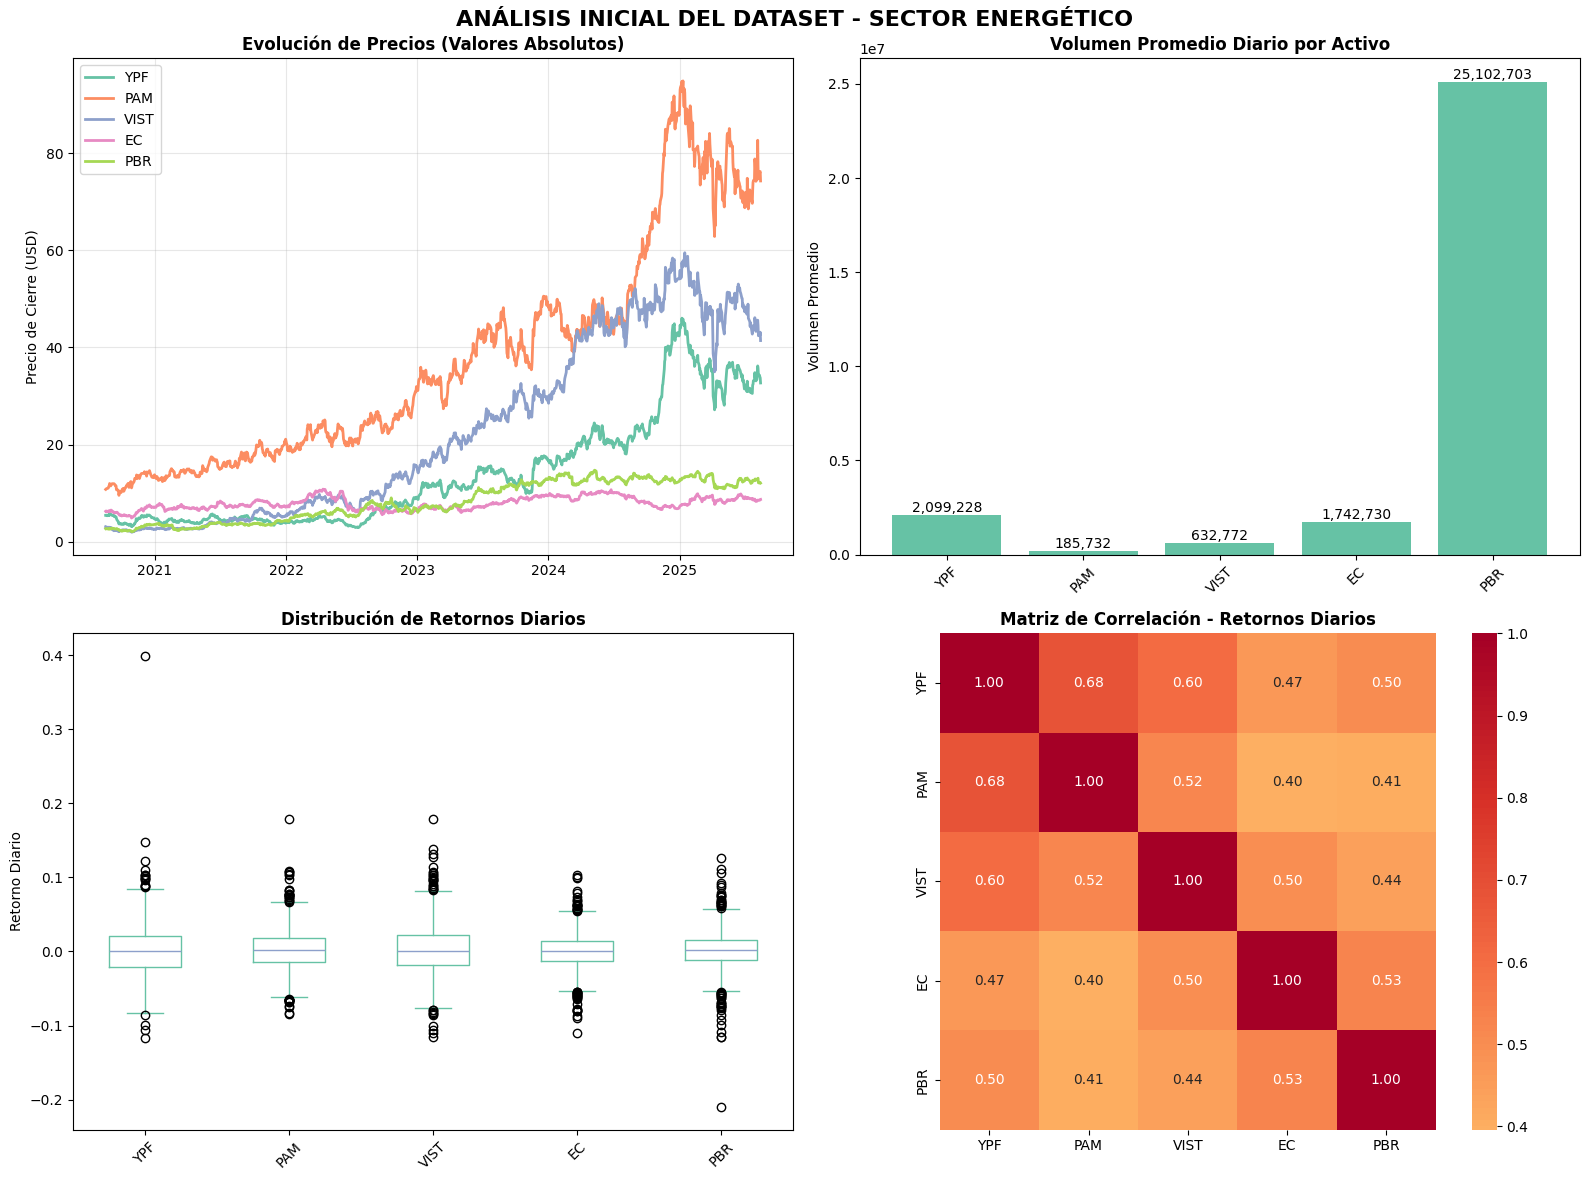

In [71]:
portfolio_data, resumen_cartera = obtener_datos_financieros(portfolio, start_date, end_date, "Cartera de Acciones")

precios_cartera, volumenes_cartera = procesar_datos(portfolio_data, "datos de cartera")
precios_benchmarks, volumenes_benchmarks = procesar_datos(benchmark_data, "datos de benchmarks")

print("VISUALIZACIÓN DEL DATASET")
print("-" * 60)

if len(precios_cartera) > 0:

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ANÁLISIS INICIAL DEL DATASET - SECTOR ENERGÉTICO', fontsize=16, fontweight='bold')

    ax1 = axes[0, 0]
    for col in precios_cartera.columns:
        ax1.plot(precios_cartera.index, precios_cartera[col], label=col, linewidth=2)
    ax1.set_title('Evolución de Precios (Valores Absolutos)', fontweight='bold')
    ax1.set_ylabel('Precio de Cierre (USD)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    if len(volumenes_cartera) > 0:
        vol_promedio = volumenes_cartera.mean()
        ax2 = axes[0, 1]
        bars = ax2.bar(vol_promedio.index, vol_promedio.values)
        ax2.set_title('Volumen Promedio Diario por Activo', fontweight='bold')
        ax2.set_ylabel('Volumen Promedio')
        ax2.tick_params(axis='x', rotation=45)

        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}', ha='center', va='bottom')

    retornos_diarios = precios_cartera.pct_change().dropna()
    ax3 = axes[1, 0]
    retornos_diarios.plot(kind='box', ax=ax3)
    ax3.set_title('Distribución de Retornos Diarios', fontweight='bold')
    ax3.set_ylabel('Retorno Diario')
    ax3.tick_params(axis='x', rotation=45)

    correlacion = retornos_diarios.corr()
    ax4 = axes[1, 1]
    sns.heatmap(correlacion, annot=True, cmap='RdYlBu_r', center=0,
                square=True, ax=ax4, fmt='.2f')
    ax4.set_title('Matriz de Correlación - Retornos Diarios', fontweight='bold')

    plt.tight_layout()
    plt.show()

### *3) Doc y fuentes*


In [72]:
def procesar_datos(datos_dict, tipo_datos):
    print(f"\n🧹 PROCESANDO {tipo_datos.upper()}...")

    precios_cierre = pd.DataFrame()
    volumenes = pd.DataFrame()

    for nombre, data in datos_dict.items():
        if len(data) > 0:
            precios_cierre[nombre] = data['Close']
            volumenes[nombre] = data['Volume']

    filas_iniciales = len(precios_cierre)
    print(f"Antes de limpieza: {filas_iniciales} filas")

    precios_cierre = precios_cierre.dropna()
    filas_finales = len(precios_cierre)
    print(f"Después de eliminar NaN: {filas_finales} filas")
    print(f"Filas eliminadas: {filas_iniciales - filas_finales}")

    if len(precios_cierre) > 0:
        total_cells = len(precios_cierre.columns) * len(precios_cierre)
        filled_cells = precios_cierre.count().sum()
        completitud = (filled_cells / total_cells) * 100
        print(f"Completitud de datos: {completitud:.1f}%")

    return precios_cierre, volumenes

print("DOCUMENTACIÓN DE FUENTES DE DATOS Y METODOLOGÍA")
print("-" * 60)

fuentes_info = {
    'Fuente Principal': 'Yahoo Finance API (yfinance)',
    'Cobertura Temporal': f'{start_date.strftime("%Y-%m-%d")} a {end_date.strftime("%Y-%m-%d")}',
    'Frecuencia': 'Diaria',
    'Moneda Base': 'USD (NYSE)',
    'Campos Obtenidos': ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
}

print("🔍 FUENTES DE DATOS:")
for key, value in fuentes_info.items():
    print(f"• {key}: {value}")

print("\n📋 METODOLOGÍA DE LIMPIEZA:")
metodologia_limpieza = [
    "1. Validación de disponibilidad de datos por ticker",
    "2. Verificación de rangos de fechas completos",
    "3. Eliminación de valores nulos (NaN) y registros incompletos",
    "4. Alineación temporal entre todos los activos",
    "5. Verificación de continuidad en días de trading",
    "6. Validación de coherencia en precios (no negativos, outliers)",
    "7. Sincronización de calendarios bursátiles"
]

for item in metodologia_limpieza:
    print(f"  {item}")

DOCUMENTACIÓN DE FUENTES DE DATOS Y METODOLOGÍA
------------------------------------------------------------
🔍 FUENTES DE DATOS:
• Fuente Principal: Yahoo Finance API (yfinance)
• Cobertura Temporal: 2020-08-16 a 2025-08-15
• Frecuencia: Diaria
• Moneda Base: USD (NYSE)
• Campos Obtenidos: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

📋 METODOLOGÍA DE LIMPIEZA:
  1. Validación de disponibilidad de datos por ticker
  2. Verificación de rangos de fechas completos
  3. Eliminación de valores nulos (NaN) y registros incompletos
  4. Alineación temporal entre todos los activos
  5. Verificación de continuidad en días de trading
  6. Validación de coherencia en precios (no negativos, outliers)
  7. Sincronización de calendarios bursátiles


### *4) Indices de referencia*

JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA
------------------------------------------------------------


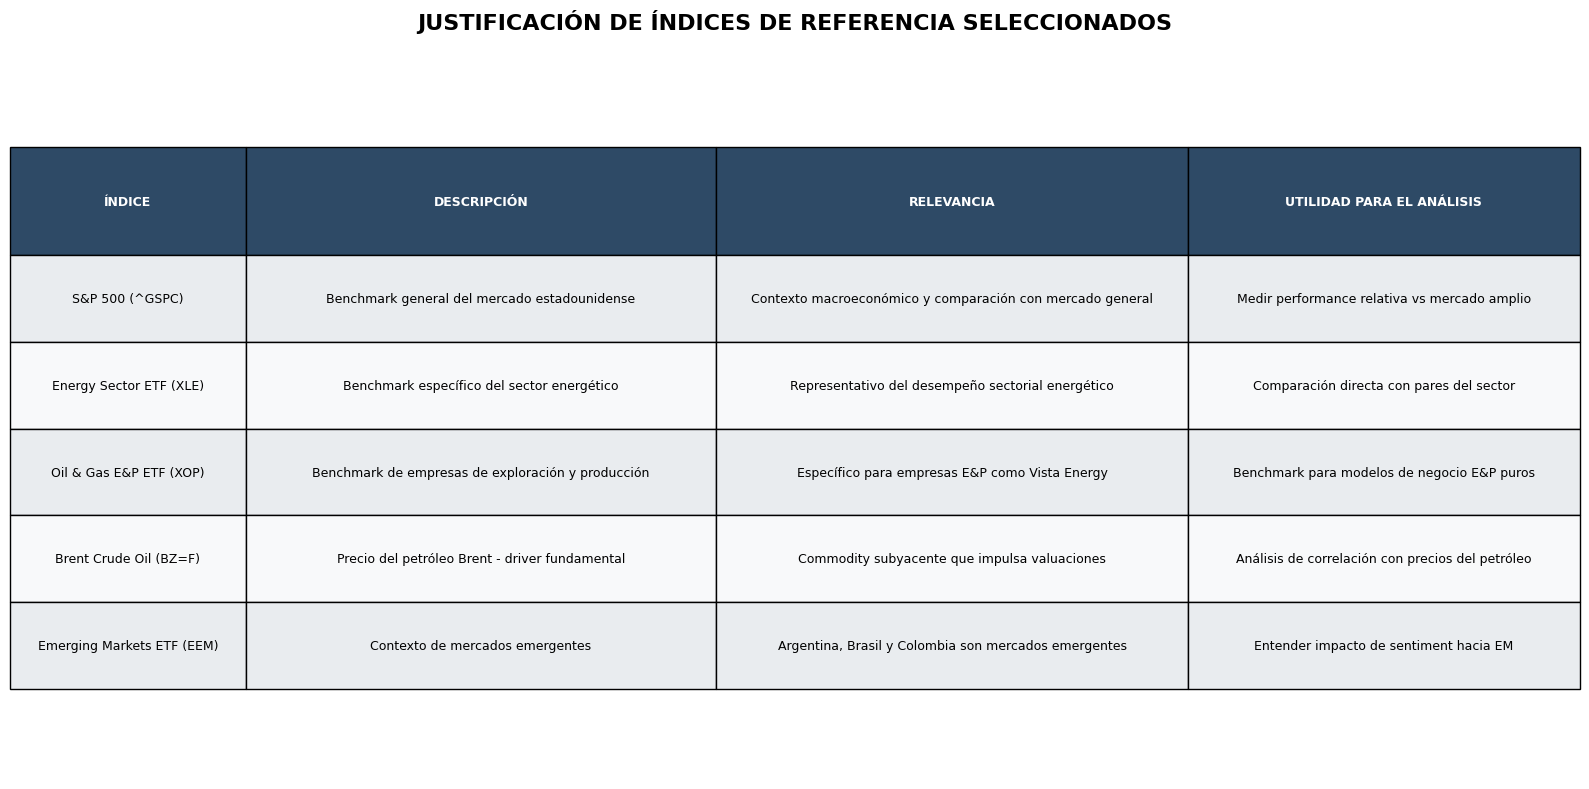


🔄 OBTENIENDO DATOS DE BENCHMARKS...

Obteniendo datos para Índices de Referencia...
  • Descargando S&P500 (^GSPC)...
    ✓ 1255 registros obtenidos
  • Descargando XLE (XLE)...
    ✓ 1255 registros obtenidos
  • Descargando XOP (XOP)...
    ✓ 1255 registros obtenidos
  • Descargando BRENT (BZ=F)...
    ✓ 1259 registros obtenidos
  • Descargando EM (EEM)...
    ✓ 1255 registros obtenidos

RESUMEN DE DATOS DE BENCHMARKS OBTENIDOS
Activo Ticker  Registros      Desde      Hasta  Precio_Inicial  Precio_Final Status
S&P500  ^GSPC       1255 2020-08-17 2025-08-14     3381.989990   6468.540039   ✓ OK
   XLE    XLE       1255 2020-08-17 2025-08-14       31.037817     85.559998   ✓ OK
   XOP    XOP       1255 2020-08-17 2025-08-14       49.616943    125.150002   ✓ OK
 BRENT   BZ=F       1259 2020-08-17 2025-08-15       45.369999     66.790001   ✓ OK
    EM    EEM       1255 2020-08-17 2025-08-14       40.021191     49.880001   ✓ OK


In [73]:
benchmarks = {
    'S&P500': '^GSPC',
    'XLE': 'XLE',
    'XOP': 'XOP',
    'BRENT': 'BZ=F',
    'EM': 'EEM'
}

print("JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA")
print("-" * 60)

indices_info = {
    'S&P 500 (^GSPC)': {
        'descripcion': 'Benchmark general del mercado estadounidense',
        'relevancia': 'Contexto macroeconómico y comparación con mercado general',
        'utilidad': 'Medir performance relativa vs mercado amplio'
    },
    'Energy Sector ETF (XLE)': {
        'descripcion': 'Benchmark específico del sector energético',
        'relevancia': 'Representativo del desempeño sectorial energético',
        'utilidad': 'Comparación directa con pares del sector'
    },
    'Oil & Gas E&P ETF (XOP)': {
        'descripcion': 'Benchmark de empresas de exploración y producción',
        'relevancia': 'Específico para empresas E&P como Vista Energy',
        'utilidad': 'Benchmark para modelos de negocio E&P puros'
    },
    'Brent Crude Oil (BZ=F)': {
        'descripcion': 'Precio del petróleo Brent - driver fundamental',
        'relevancia': 'Commodity subyacente que impulsa valuaciones',
        'utilidad': 'Análisis de correlación con precios del petróleo'
    },
    'Emerging Markets ETF (EEM)': {
        'descripcion': 'Contexto de mercados emergentes',
        'relevancia': 'Argentina, Brasil y Colombia son mercados emergentes',
        'utilidad': 'Entender impacto de sentiment hacia EM'
    }
}

indices_table_data = []
for indice, info in indices_info.items():
    indices_table_data.append([
        indice,
        info['descripcion'],
        info['relevancia'],
        info['utilidad']
    ])


def crear_tabla_indices(data):
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(
        cellText=data,
        colLabels=['ÍNDICE', 'DESCRIPCIÓN', 'RELEVANCIA', 'UTILIDAD PARA EL ANÁLISIS'],
        cellLoc='center',
        loc='center',
        colWidths=[0.15, 0.3, 0.3, 0.25]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 2)

    for i in range(len(data[0])):
        table[(0, i)].set_facecolor('#2E4A66')
        table[(0, i)].set_text_props(weight='bold', color='white')
        table[(0, i)].set_height(0.15)

    colors = ['#F8F9FA', '#E9ECEF']
    for i in range(1, len(data) + 1):
        for j in range(len(data[0])):
            table[(i, j)].set_facecolor(colors[i % 2])
            table[(i, j)].set_height(0.12)

    plt.title('JUSTIFICACIÓN DE ÍNDICES DE REFERENCIA SELECCIONADOS',
              fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

crear_tabla_indices(indices_table_data)

print("\n🔄 OBTENIENDO DATOS DE BENCHMARKS...")
benchmark_data, resumen_benchmarks = obtener_datos_financieros(benchmarks, start_date, end_date, "Índices de Referencia")

print("\n" + "="*60)
print("RESUMEN DE DATOS DE BENCHMARKS OBTENIDOS")
print("="*60)
print(resumen_benchmarks.to_string(index=False))

globals()['benchmark_data'] = benchmark_data
globals()['resumen_benchmarks'] = resumen_benchmarks

### *4)a Estadistica descrptiva*

In [74]:
import pandas as pd
from scipy import stats
import numpy as np

print("ESTADÍSTICAS DESCRIPTIVAS DEL DATASET")
print("-" * 60)

if len(precios_cartera) > 0:

    retornos_diarios = precios_cartera.pct_change().dropna()

    estadisticas_precios = pd.DataFrame({
        'Precio_Inicial_USD': precios_cartera.iloc[0],
        'Precio_Final_USD': precios_cartera.iloc[-1],
        'Precio_Promedio_USD': precios_cartera.mean(),
        'Precio_Max_USD': precios_cartera.max(),
        'Precio_Min_USD': precios_cartera.min(),
        'Desv_Std_Precio': precios_cartera.std()
    })

    estadisticas_retornos = pd.DataFrame({
        'Retorno_Total_%': ((precios_cartera.iloc[-1] / precios_cartera.iloc[0]) - 1) * 100,
        'Retorno_Promedio_Diario_%': retornos_diarios.mean() * 100,
        'Volatilidad_Diaria_%': retornos_diarios.std() * 100,
        'Volatilidad_Anual_%': retornos_diarios.std() * np.sqrt(252) * 100,
        'Retorno_Max_Diario_%': retornos_diarios.max() * 100,
        'Retorno_Min_Diario_%': retornos_diarios.min() * 100
    })

    estadisticas_volumen = pd.DataFrame({
        'Vol_Promedio_Diario': volumenes_cartera.mean(),
        'Vol_Mediano': volumenes_cartera.median(),
        'Vol_Maximo': volumenes_cartera.max(),
        'Vol_Minimo': volumenes_cartera.min(),
        'Vol_Desv_Std': volumenes_cartera.std()
    })

    distribucion_stats = pd.DataFrame({
        'Asimetría': retornos_diarios.skew(),
        'Curtosis': retornos_diarios.kurtosis(),
        'P25_%': retornos_diarios.quantile(0.25) * 100,
        'P50_%': retornos_diarios.quantile(0.50) * 100,
        'P75_%': retornos_diarios.quantile(0.75) * 100,
        'P95_%': retornos_diarios.quantile(0.95) * 100
    })

    print("\n📊 ESTADÍSTICAS DE PRECIOS (USD):")
    print(estadisticas_precios.round(2).to_string())

    print("\n📈 ESTADÍSTICAS DE RETORNOS:")
    print(estadisticas_retornos.round(2).to_string())

    if len(volumenes_cartera) > 0:
        print("\n📊 ESTADÍSTICAS DE VOLUMEN:")
        print(estadisticas_volumen.round(0).to_string())

    print("\n📈 ANÁLISIS DE DISTRIBUCIÓN DE RETORNOS:")
    print(distribucion_stats.round(2).to_string())

    print("\n" + "="*80)
    print("✅ ESTADÍSTICAS DESCRIPTIVAS COMPLETADAS")
    print("📊 Métricas clave calculadas y presentadas en tablas")
    print("="*80)

ESTADÍSTICAS DESCRIPTIVAS DEL DATASET
------------------------------------------------------------

📊 ESTADÍSTICAS DE PRECIOS (USD):
      Precio_Inicial_USD  Precio_Final_USD  Precio_Promedio_USD  Precio_Max_USD  Precio_Min_USD  Desv_Std_Precio
YPF                 5.44             32.69                13.83           46.03            2.91            11.27
PAM                10.78             74.28                36.99           94.88            9.55            22.24
VIST                3.10             41.42                22.48           59.50            1.99            18.25
EC                  6.27              8.72                 7.88           10.83            4.88             1.28
PBR                 2.69             12.08                 8.22           14.73            2.06             4.03

📈 ESTADÍSTICAS DE RETORNOS:
      Retorno_Total_%  Retorno_Promedio_Diario_%  Volatilidad_Diaria_%  Volatilidad_Anual_%  Retorno_Max_Diario_%  Retorno_Min_Diario_%
YPF            500.92   

### *5) Comparación de Indices con Benchmarks*

COMPARACIÓN CON BENCHMARKS
------------------------------------------------------------
📊 ESTADÍSTICAS COMPARATIVAS CON BENCHMARKS:
        Valor_Inicial  Valor_Final  Retorno_Total_%  Volatilidad_Anual_%  \
S&P500        3381.99      6468.54            91.26                17.39   
XLE             31.04        85.56           175.66                29.05   
XOP             49.62       125.15           152.23                37.63   
BRENT           45.37        66.72            47.06                34.57   
EM              40.02        49.88            24.63                18.47   

        Sharpe_Aproximado  
S&P500               0.84  
XLE                  0.85  
XOP                  0.68  
BRENT                0.40  
EM                   0.33  


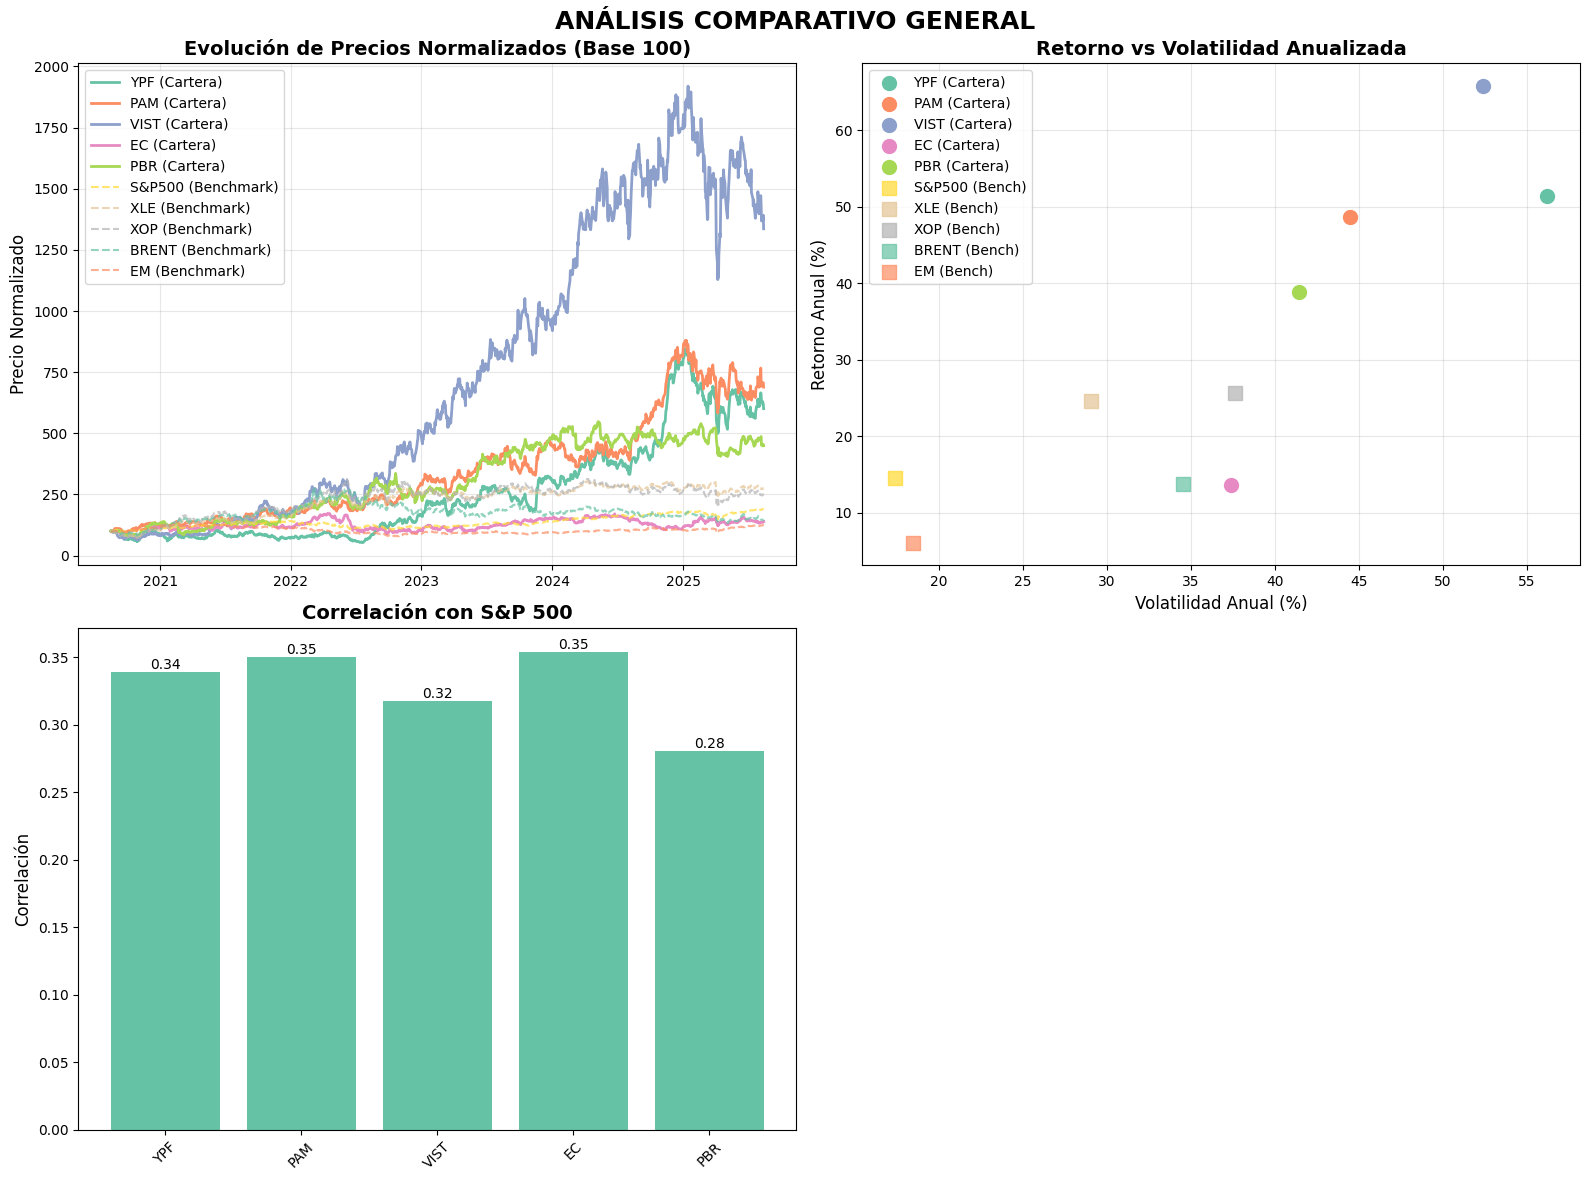


📉 DRAWDOWN HISTÓRICO INDIVIDUALES
------------------------------------------------------------


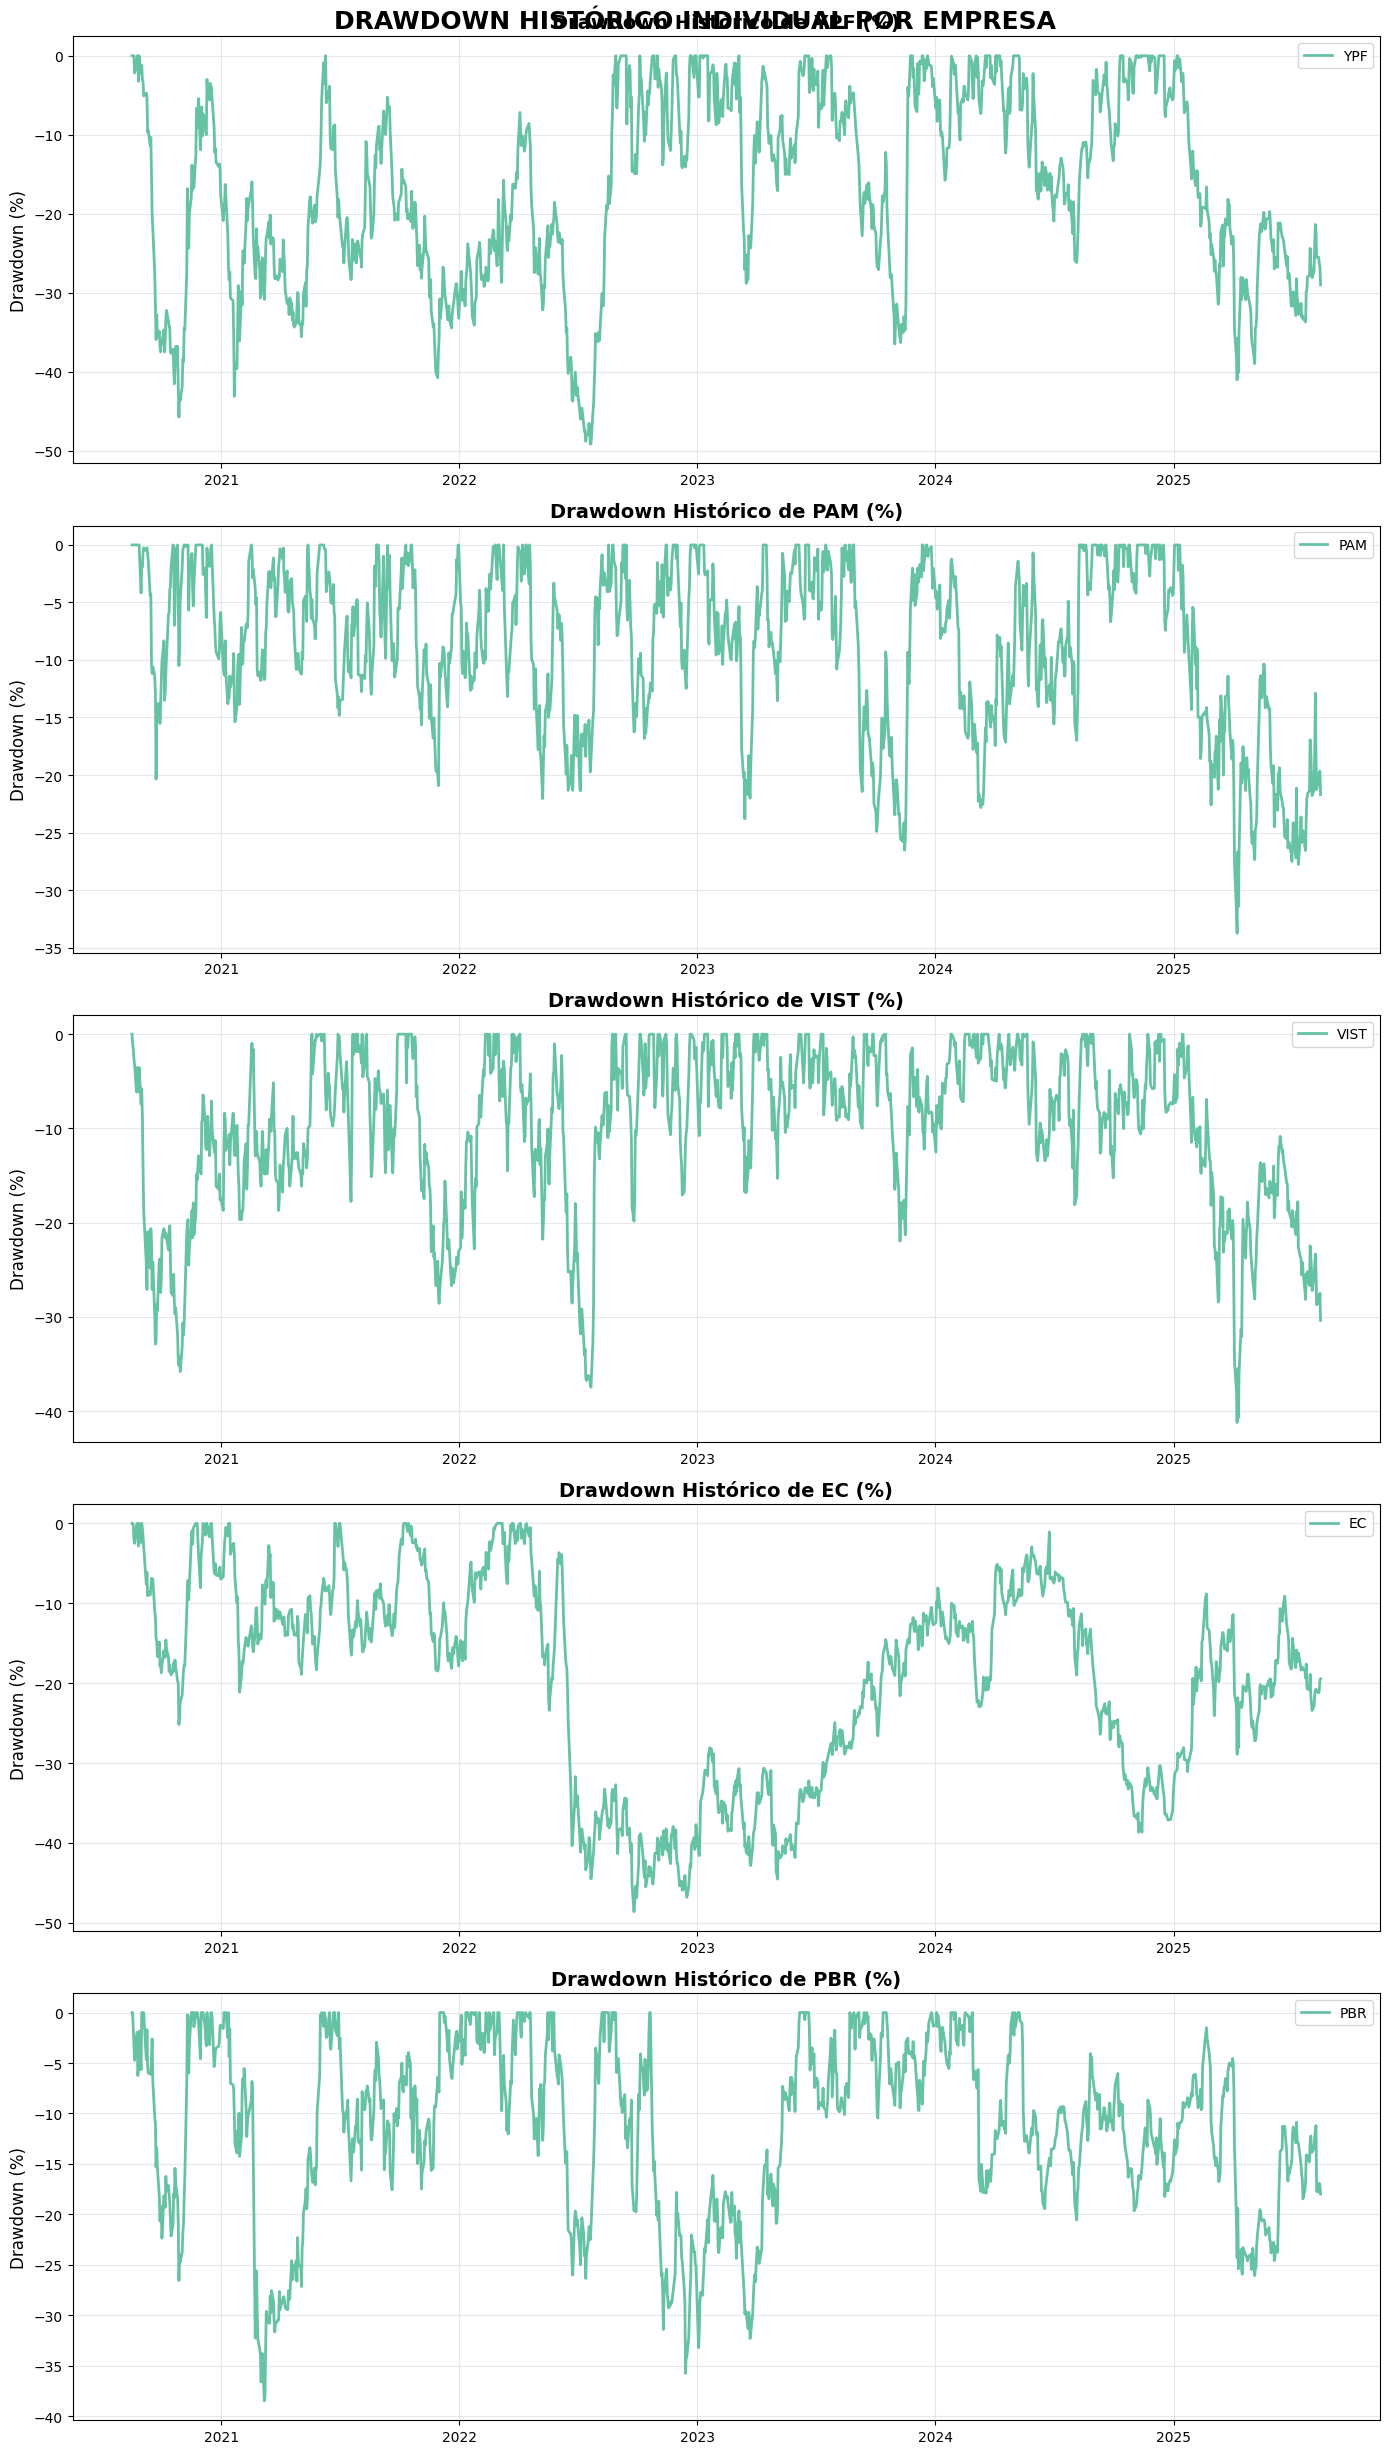

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

print("COMPARACIÓN CON BENCHMARKS")
print("-" * 60)

if len(precios_benchmarks) > 0:

    retornos_benchmarks = precios_benchmarks.pct_change().dropna()

    print("📊 ESTADÍSTICAS COMPARATIVAS CON BENCHMARKS:")
    bench_stats = pd.DataFrame({
        'Valor_Inicial': precios_benchmarks.iloc[0],
        'Valor_Final': precios_benchmarks.iloc[-1],
        'Retorno_Total_%': ((precios_benchmarks.iloc[-1] / precios_benchmarks.iloc[0]) - 1) * 100,
        'Volatilidad_Anual_%': retornos_benchmarks.std() * np.sqrt(252) * 100,
        'Sharpe_Aproximado': (retornos_benchmarks.mean() * 252) / (retornos_benchmarks.std() * np.sqrt(252))
    })
    print(bench_stats.round(2))

    cartera_norm = (precios_cartera / precios_cartera.iloc[0]) * 100

    fig_general, axes_general = plt.subplots(2, 2, figsize=(16, 12))
    fig_general.suptitle('ANÁLISIS COMPARATIVO GENERAL', fontsize=18, fontweight='bold')

    axes_general = axes_general.flatten()

    ax1 = axes_general[0]
    for col in cartera_norm.columns:
        ax1.plot(cartera_norm.index, cartera_norm[col], label=f"{col} (Cartera)", linewidth=2)

    bench_norm = (precios_benchmarks / precios_benchmarks.iloc[0]) * 100
    for col in bench_norm.columns:
        ax1.plot(bench_norm.index, bench_norm[col], label=f"{col} (Benchmark)", linestyle='--', alpha=0.7)

    ax1.set_title('Evolución de Precios Normalizados (Base 100)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Precio Normalizado', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='both', which='major', labelsize=10)

    ax2 = axes_general[1]

    for col in retornos_diarios.columns:
        ret_anual = retornos_diarios[col].mean() * 252 * 100
        vol_anual = retornos_diarios[col].std() * np.sqrt(252) * 100
        ax2.scatter(vol_anual, ret_anual, label=f"{col} (Cartera)", s=100)

    for col in retornos_benchmarks.columns:
        ret_anual = retornos_benchmarks[col].mean() * 252 * 100
        vol_anual = retornos_benchmarks[col].std() * np.sqrt(252) * 100
        ax2.scatter(vol_anual, ret_anual, label=f"{col} (Bench)", marker='s', s=100, alpha=0.7)

    ax2.set_title('Retorno vs Volatilidad Anualizada', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Volatilidad Anual (%)', fontsize=12)
    ax2.set_ylabel('Retorno Anual (%)', fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='both', which='major', labelsize=10)

    if 'S&P500' in retornos_benchmarks.columns:
        ax3 = axes_general[2]
        correlaciones_sp500 = retornos_diarios.corrwith(retornos_benchmarks['S&P500'])
        bars = ax3.bar(correlaciones_sp500.index, correlaciones_sp500.values)
        ax3.set_title('Correlación con S&P 500', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Correlación', fontsize=12)
        ax3.tick_params(axis='x', rotation=45, labelsize=10)

        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=10)
    else:
        axes_general[2].axis('off')

    axes_general[3].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n📉 DRAWDOWN HISTÓRICO INDIVIDUALES")
    print("-" * 60)

    rolling_max_all = cartera_norm.expanding().max()
    drawdown_all = (cartera_norm / rolling_max_all - 1) * 100

    fig_drawdowns, axes_drawdowns = plt.subplots(len(cartera_norm.columns), 1, figsize=(14, 5 * len(cartera_norm.columns)))
    fig_drawdowns.suptitle('DRAWDOWN HISTÓRICO INDIVIDUAL POR EMPRESA', fontsize=18, fontweight='bold')

    if len(cartera_norm.columns) == 1:
        axes_drawdowns = [axes_drawdowns]

    for i, col in enumerate(cartera_norm.columns):
        ax = axes_drawdowns[i]
        ax.plot(drawdown_all.index, drawdown_all[col], label=col, linewidth=2)
        ax.set_title(f'Drawdown Histórico de {col} (%)', fontsize=14, fontweight='bold')
        ax.set_ylabel('Drawdown (%)', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    plt.show()

### *Pregunta Critica*

¿Qué criterios utilizaste para seleccionar empresas comparables y por qué estos criterios son relevantes para un inversor argentino?

Para seleccionar empresas comparables con YPF se comenzo con empresas que estan cotizando en NYSE (USD) para eliminar el riesgo cambiario. Se eligio empresas dentro de la region de Latinoamerica para que si hay riegos geopoliticos o cambio regulatorios en la region afecten de la misma forma. Ademas se busco modelos de negocios similares para nuestro sector.


---
# **B. Análisis descriptivo Avanzado**
---

## *1) Gráficos de precios normalizados (base 100)*

📈 ANÁLISIS DE PRECIOS NORMALIZADOS (BASE 100)
------------------------------------------------------------
📅 Período: 2020-08-17 a 2025-08-14
📊 Observaciones: 1255


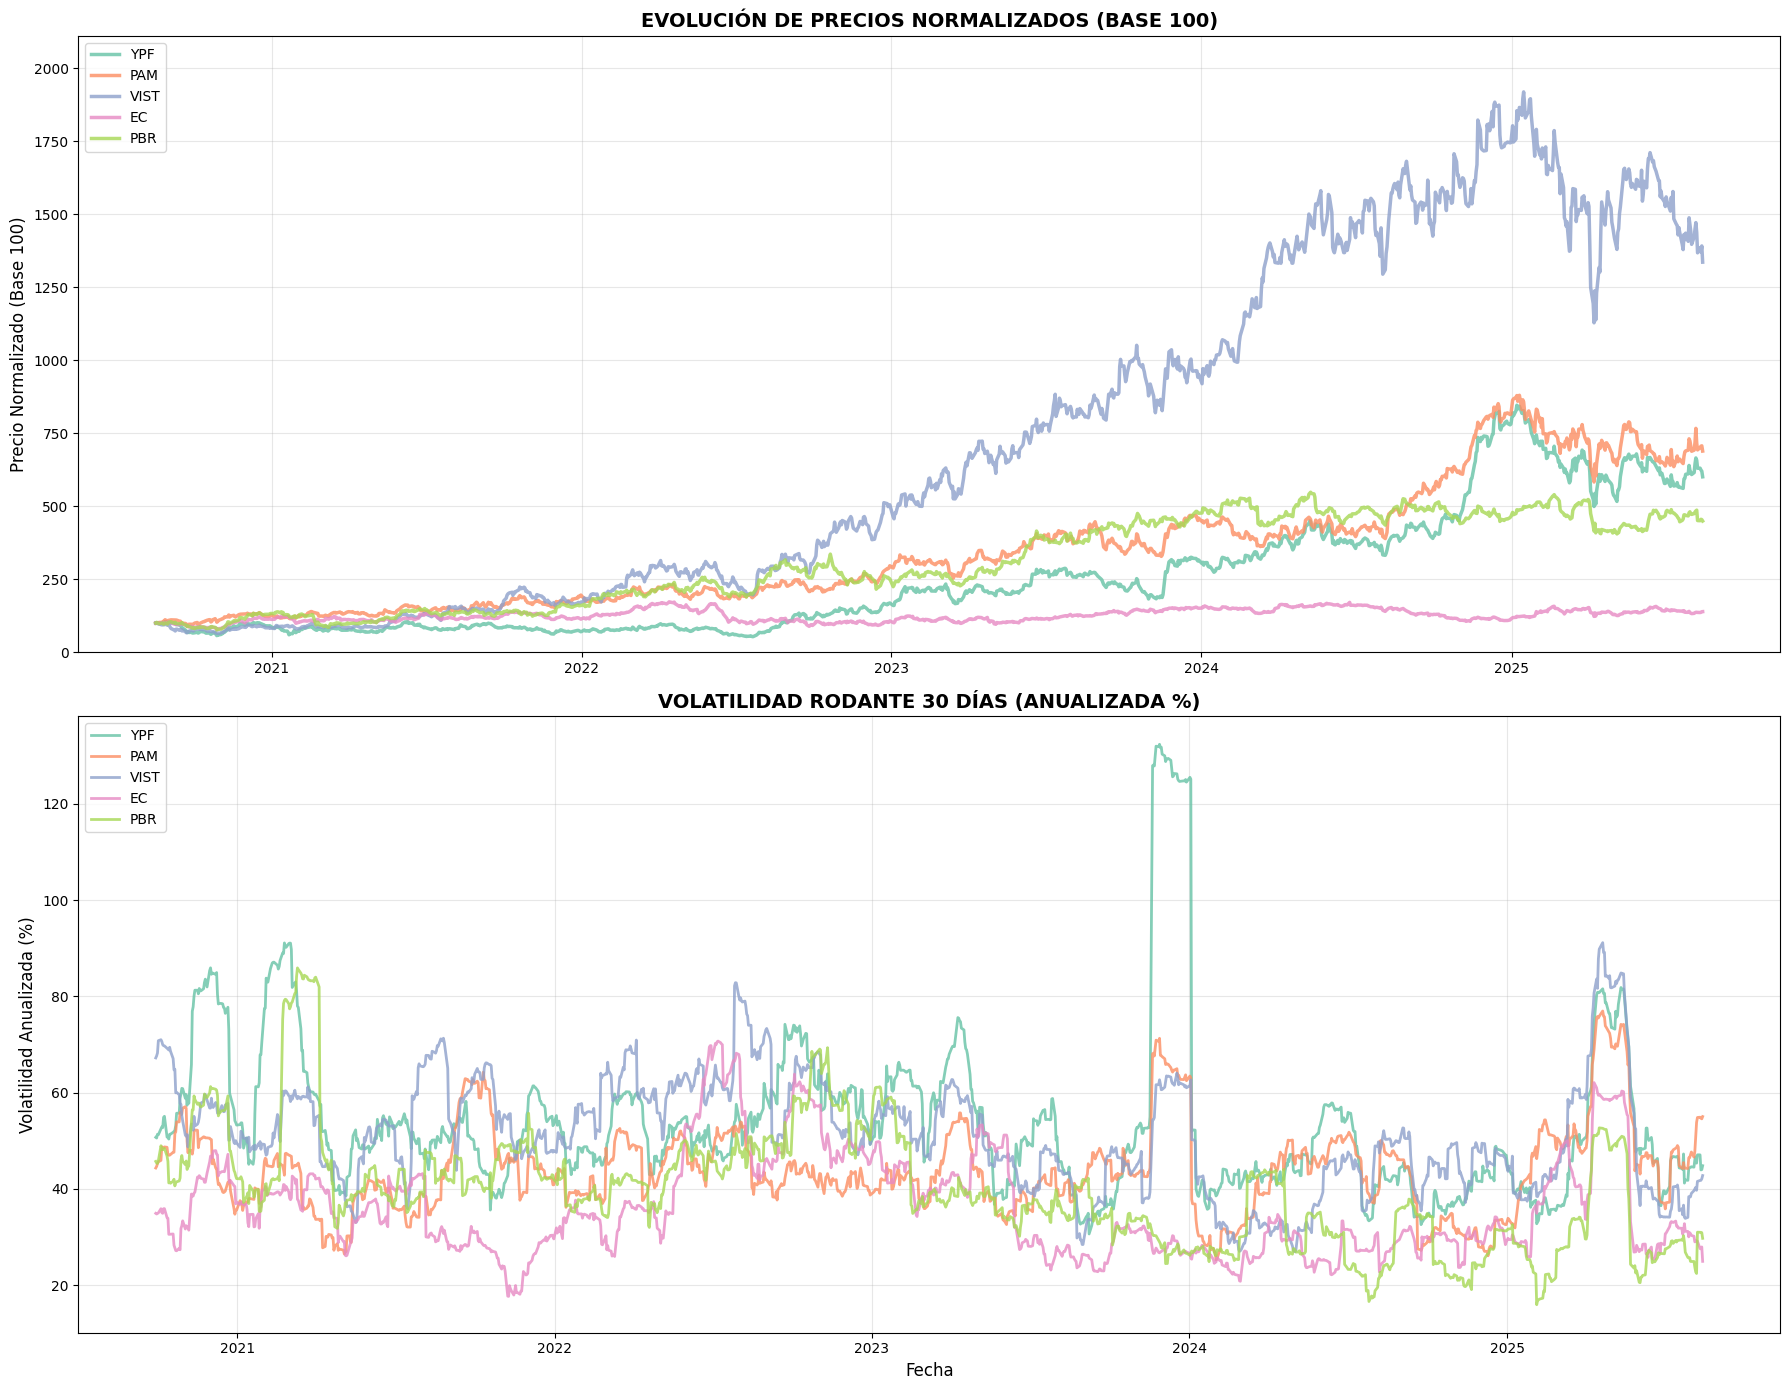


📊 RENDIMIENTOS ACUMULADOS:
      Precio_Inicial  Precio_Final  Rendimiento_Total_%  Volatilidad_Anual_%
YPF             5.44         32.69               500.92                56.23
PAM            10.78         74.28               589.05                44.47
VIST            3.10         41.42              1236.13                52.42
EC              6.27          8.72                39.12                37.38
PBR             2.69         12.08               349.48                41.46


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

print("📈 ANÁLISIS DE PRECIOS NORMALIZADOS (BASE 100)")
print("-" * 60)

precios_normalizados = (precios_cartera / precios_cartera.iloc[0]) * 100
retornos_diarios = precios_cartera.pct_change().dropna()

print(f"📅 Período: {precios_cartera.index[0].strftime('%Y-%m-%d')} a {precios_cartera.index[-1].strftime('%Y-%m-%d')}")
print(f"📊 Observaciones: {len(precios_cartera)}")

fig, axes = plt.subplots(2, 1, figsize=(18, 14))

ax1 = axes[0]
for activo in precios_normalizados.columns:
    ax1.plot(precios_normalizados.index, precios_normalizados[activo],
             label=activo, linewidth=2.5, alpha=0.8)

ax1.set_title('EVOLUCIÓN DE PRECIOS NORMALIZADOS (BASE 100)',
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Precio Normalizado (Base 100)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, max(precios_normalizados.max()) * 1.1)

volatilidad_rodante = retornos_diarios.rolling(window=30).std() * np.sqrt(252) * 100
ax2 = axes[1]

for activo in volatilidad_rodante.columns:
    ax2.plot(volatilidad_rodante.index, volatilidad_rodante[activo],
             label=activo, linewidth=2, alpha=0.8)

ax2.set_title('VOLATILIDAD RODANTE 30 DÍAS (ANUALIZADA %)',
              fontsize=14, fontweight='bold')
ax2.set_ylabel('Volatilidad Anualizada (%)', fontsize=12)
ax2.set_xlabel('Fecha', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 RENDIMIENTOS ACUMULADOS:")
rendimientos_acumulados = ((precios_cartera.iloc[-1] / precios_cartera.iloc[0]) - 1) * 100
rendimientos_df = pd.DataFrame({
    'Precio_Inicial': precios_cartera.iloc[0],
    'Precio_Final': precios_cartera.iloc[-1],
    'Rendimiento_Total_%': rendimientos_acumulados,
    'Volatilidad_Anual_%': retornos_diarios.std() * np.sqrt(252) * 100
})
print(rendimientos_df.round(2))

## *2) Identificar y explicar 3 eventos*

🌍 IDENTIFICACIÓN DE EVENTOS MACROECONÓMICOS CLAVE
------------------------------------------------------------

1. COVID-19 Crash - Febrero 2020
📅 Febrero 2020 | 📊 Caída sincronizada 70-80%
🎯 Más impactados: ['Todos - especialmente YPF y VIST']
🔑 Factor: Colapso demanda + pánico generalizado

IMPACTO REAL: Crash simultáneo de todo el sector energético
• Todas las acciones caen en paralelo desde febrero 2020
• YPF, VIST, PAM: caídas superiores al 70%
• PBR y EC: más resistentes pero también caen 50-60%
• DURACIÓN: Febrero-abril 2020, recuperación gradual hasta octubre

2. Guerra Ucrania Rally - Marzo 2022
📅 Marzo 2022 | 📊 Segunda ola alcista +30-50%
🎯 Más impactados: ['VIST, YPF (beneficiados), PBR, EC']
🔑 Factor: Seguridad energética + sanctions premium

IMPACTO REAL: Rally geopolítico en commodities energéticos
• VIST tiene segunda subida significativa desde marzo 2022
• Revalorización de productores no-rusos (LatAm)
• Brent >$120, crisis energética europea
• DURACIÓN: Marzo-junio 202

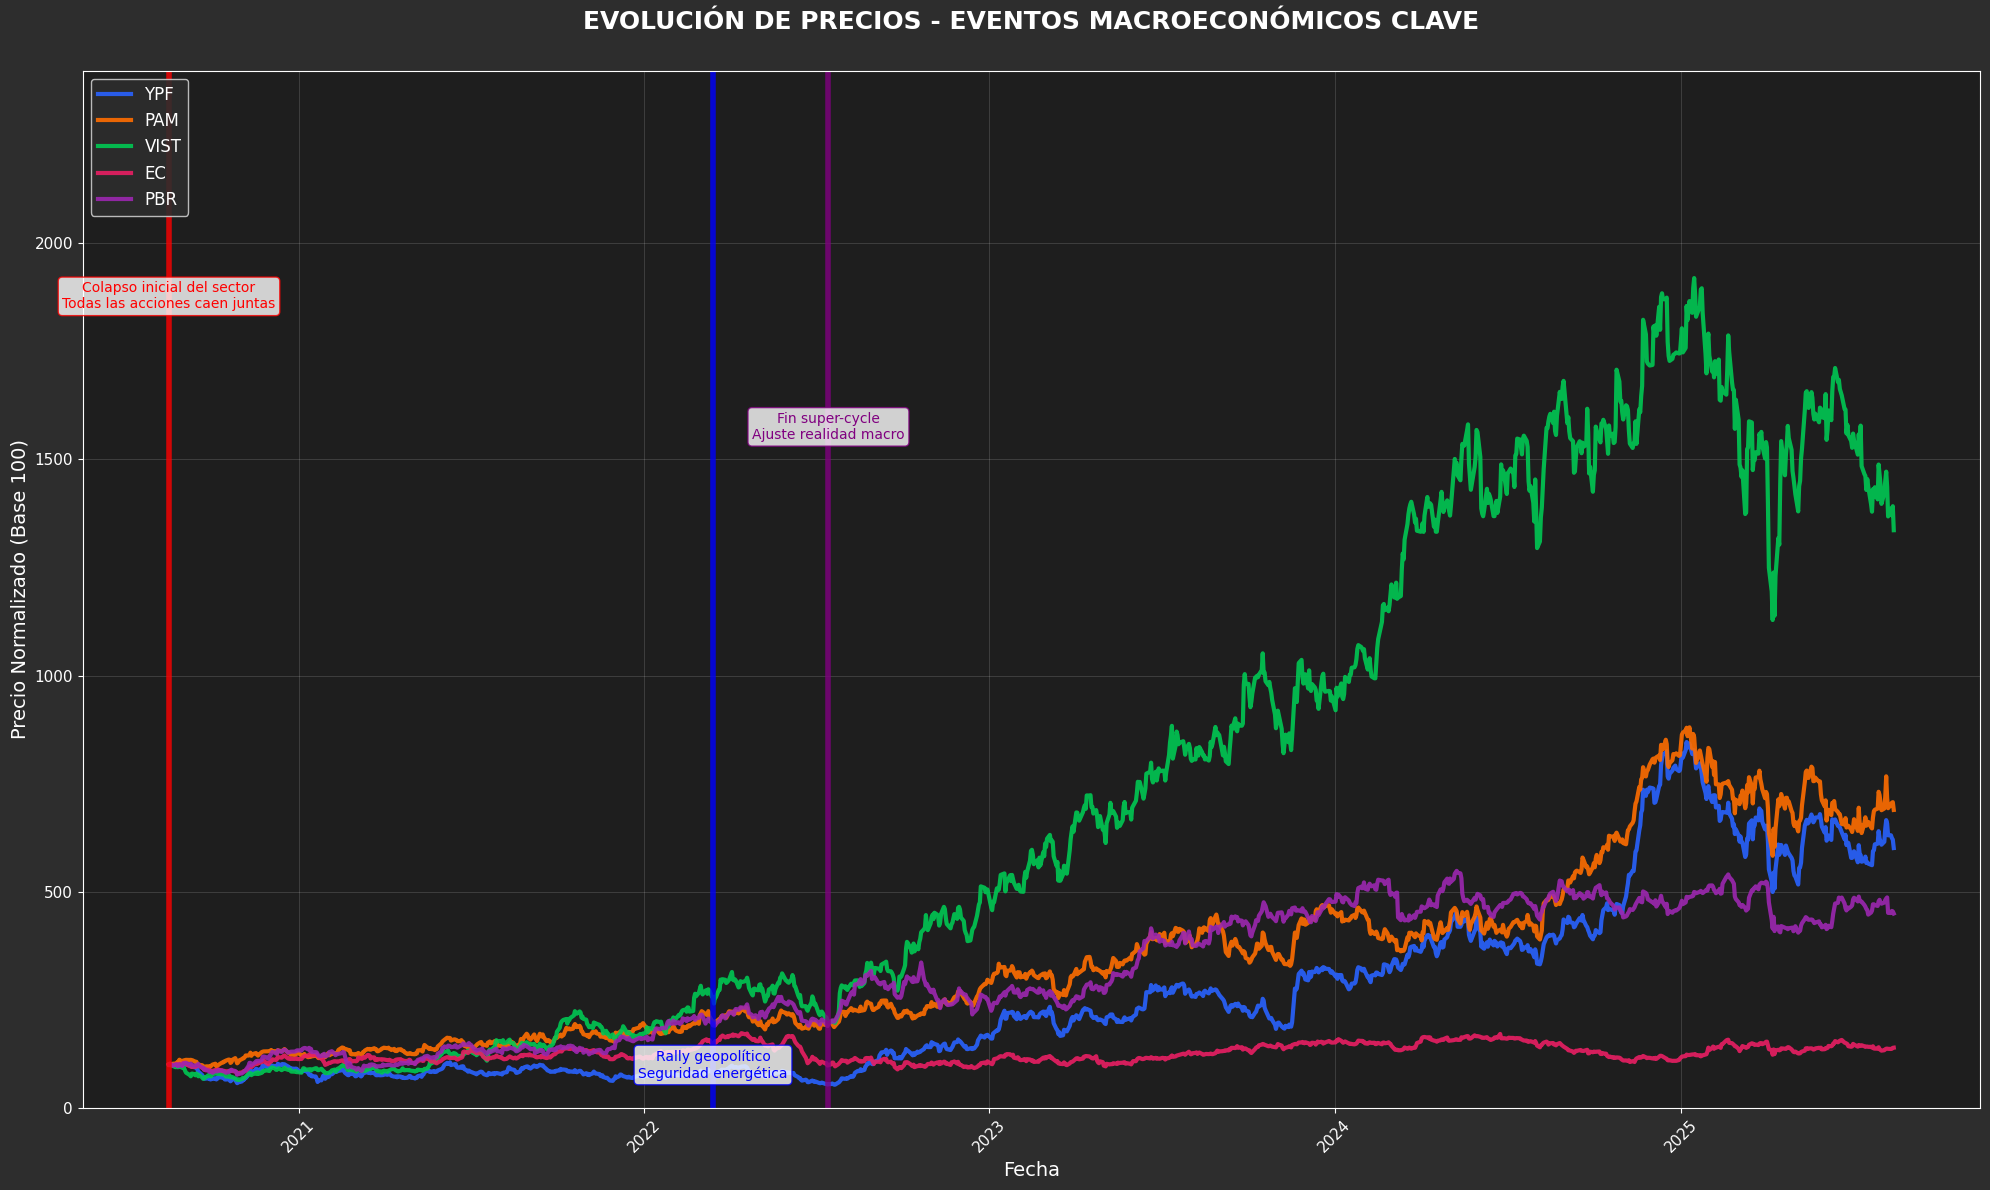


📊 RESULTADO: 3/3 eventos marcados
✅ Módulo B - Eventos Clave actualizado con 3 eventos macroeconómicos


In [91]:
print("🌍 IDENTIFICACIÓN DE EVENTOS MACROECONÓMICOS CLAVE")
print("-" * 60)

eventos_principales = {
    '1. COVID-19 Crash - Febrero 2020': {
        'Fecha': 'Febrero 2020',
        'Impacto': 'Caída sincronizada 70-80%',
        'Descripción': """
IMPACTO REAL: Crash simultáneo de todo el sector energético
• Todas las acciones caen en paralelo desde febrero 2020
• YPF, VIST, PAM: caídas superiores al 70%
• PBR y EC: más resistentes pero también caen 50-60%
• DURACIÓN: Febrero-abril 2020, recuperación gradual hasta octubre""",
        'Activos_Impactados': ['Todos - especialmente YPF y VIST'],
        'Factor_Clave': 'Colapso demanda + pánico generalizado'
    },

    '2. Guerra Ucrania Rally - Marzo 2022': {
        'Fecha': 'Marzo 2022',
        'Impacto': 'Segunda ola alcista +30-50%',
        'Descripción': """
IMPACTO REAL: Rally geopolítico en commodities energéticos
• VIST tiene segunda subida significativa desde marzo 2022
• Revalorización de productores no-rusos (LatAm)
• Brent >$120, crisis energética europea
• DURACIÓN: Marzo-junio 2022, antes de corrección final""",
        'Activos_Impactados': ['VIST, YPF (beneficiados), PBR, EC'],
        'Factor_Clave': 'Seguridad energética + sanctions premium'
    },

    '3. Corrección Masiva - Julio 2022': {
        'Fecha': 'Julio 2022',
        'Impacto': 'Caída desde máximos -60-70%',
        'Descripción': """
IMPACTO REAL: Fin del super-cycle, ajuste a realidad macro
• VIST cae de ~1900 a mínimos de ~400-600 (2023)
• YPF y PAM: correcciones de 50-70% desde máximos
• Causas: Inflación, subida tasas Fed, recesión fears
• DURACIÓN: Julio 2022 - octubre 2023 (15 meses)""",
        'Activos_Impactados': ['Todos - especialmente growth stocks'],
        'Factor_Clave': 'Tightening Fed + growth repricing'
    }
}

for evento, detalles in eventos_principales.items():
    print(f"\n{evento}")
    print("="*50)
    print(f"📅 {detalles['Fecha']} | 📊 {detalles['Impacto']}")
    print(f"🎯 Más impactados: {detalles['Activos_Impactados']}")
    print(f"🔑 Factor: {detalles['Factor_Clave']}")
    print(detalles['Descripción'])

fig, ax = plt.subplots(figsize=(20, 12))

colors = ['#2962FF', '#FF6D00', '#00C853', '#E91E63', '#9C27B0']
for i, activo in enumerate(precios_normalizados.columns):
    ax.plot(precios_normalizados.index, precios_normalizados[activo],
            label=activo, linewidth=3, alpha=0.9, color=colors[i % len(colors)])

eventos_fechas = [
    '2020-02-15',
    '2022-03-15',
    '2022-07-15'
]

eventos_nombres = [
    'COVID-19 Crash\n(Feb 2020)',
    'Guerra Ucrania\n(Mar 2022)',
    'Corrección Masiva\n(Jul 2022)'
]

eventos_colores = ['red', 'blue', 'purple']

eventos_descripciones = [
    'Colapso inicial del sector\nTodas las acciones caen juntas',
    'Rally geopolítico\nSeguridad energética',
    'Fin super-cycle\nAjuste realidad macro'
]

precios_index_naive = precios_normalizados.index.tz_convert(None)
print(f"\n📅 Rango disponible: {precios_index_naive[0].strftime('%Y-%m-%d')} a {precios_index_naive[-1].strftime('%Y-%m-%d')}")

eventos_marcados = 0
for i, fecha_str in enumerate(eventos_fechas):
    try:
        fecha_evento = pd.Timestamp(fecha_str)

        if fecha_evento < precios_index_naive[0]:
            fecha_cercana = precios_index_naive[0]
        elif fecha_evento > precios_index_naive[-1]:
            fecha_cercana = precios_index_naive[-1]
        else:
            idx = precios_index_naive.get_indexer([fecha_evento], method='nearest')[0]
            fecha_cercana = precios_index_naive[idx]


        ax.axvline(x=fecha_cercana,
                  color=eventos_colores[i],
                  linestyle='-',
                  linewidth=4,
                  alpha=0.8)

        if i == 0:
             y_pos = ax.get_ylim()[1] * 0.95
             va = 'top'
        elif i == 1:
             y_pos = ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05
             va = 'bottom'
        else:
             y_pos = ax.get_ylim()[1] * 0.8
             va = 'top'


        ax.text(fecha_cercana, y_pos, eventos_descripciones[i],
               rotation=0, ha='center', va=va,
               fontsize=10, fontweight='normal',
               color=eventos_colores[i],
               bbox=dict(boxstyle="round,pad=0.3",
                        facecolor='white',
                        alpha=0.8,
                        edgecolor=eventos_colores[i]))

        eventos_marcados += 1
        print(f"✅ {eventos_nombres[i]}: {fecha_cercana.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"❌ Error con {eventos_nombres[i]}: {e}")

ax.set_facecolor('#1E1E1E')
fig.patch.set_facecolor('#2D2D2D')

ax.set_title('EVOLUCIÓN DE PRECIOS - EVENTOS MACROECONÓMICOS CLAVE',
             fontsize=18, fontweight='bold', color='white', pad=30)
ax.set_ylabel('Precio Normalizado (Base 100)', fontsize=14, color='white')
ax.set_xlabel('Fecha', fontsize=14, color='white')

ax.grid(True, alpha=0.2, color='white', linestyle='-', linewidth=0.5)

legend = ax.legend(loc='upper left', fontsize=12, frameon=True)
legend.get_frame().set_facecolor('#2D2D2D')
legend.get_frame().set_alpha(0.9)
for text in legend.get_texts():
    text.set_color('white')

ax.tick_params(colors='white', labelsize=11)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.set_ylim(0, precios_normalizados.max().max() * 1.25)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n📊 RESULTADO: {eventos_marcados}/3 eventos marcados")
print(f"✅ Módulo B - Eventos Clave actualizado con 3 eventos macroeconómicos")

##*3) Análisis de estacionalidad por trimestres*

📅 ANÁLISIS DE ESTACIONALIDAD POR TRIMESTRES
------------------------------------------------------------


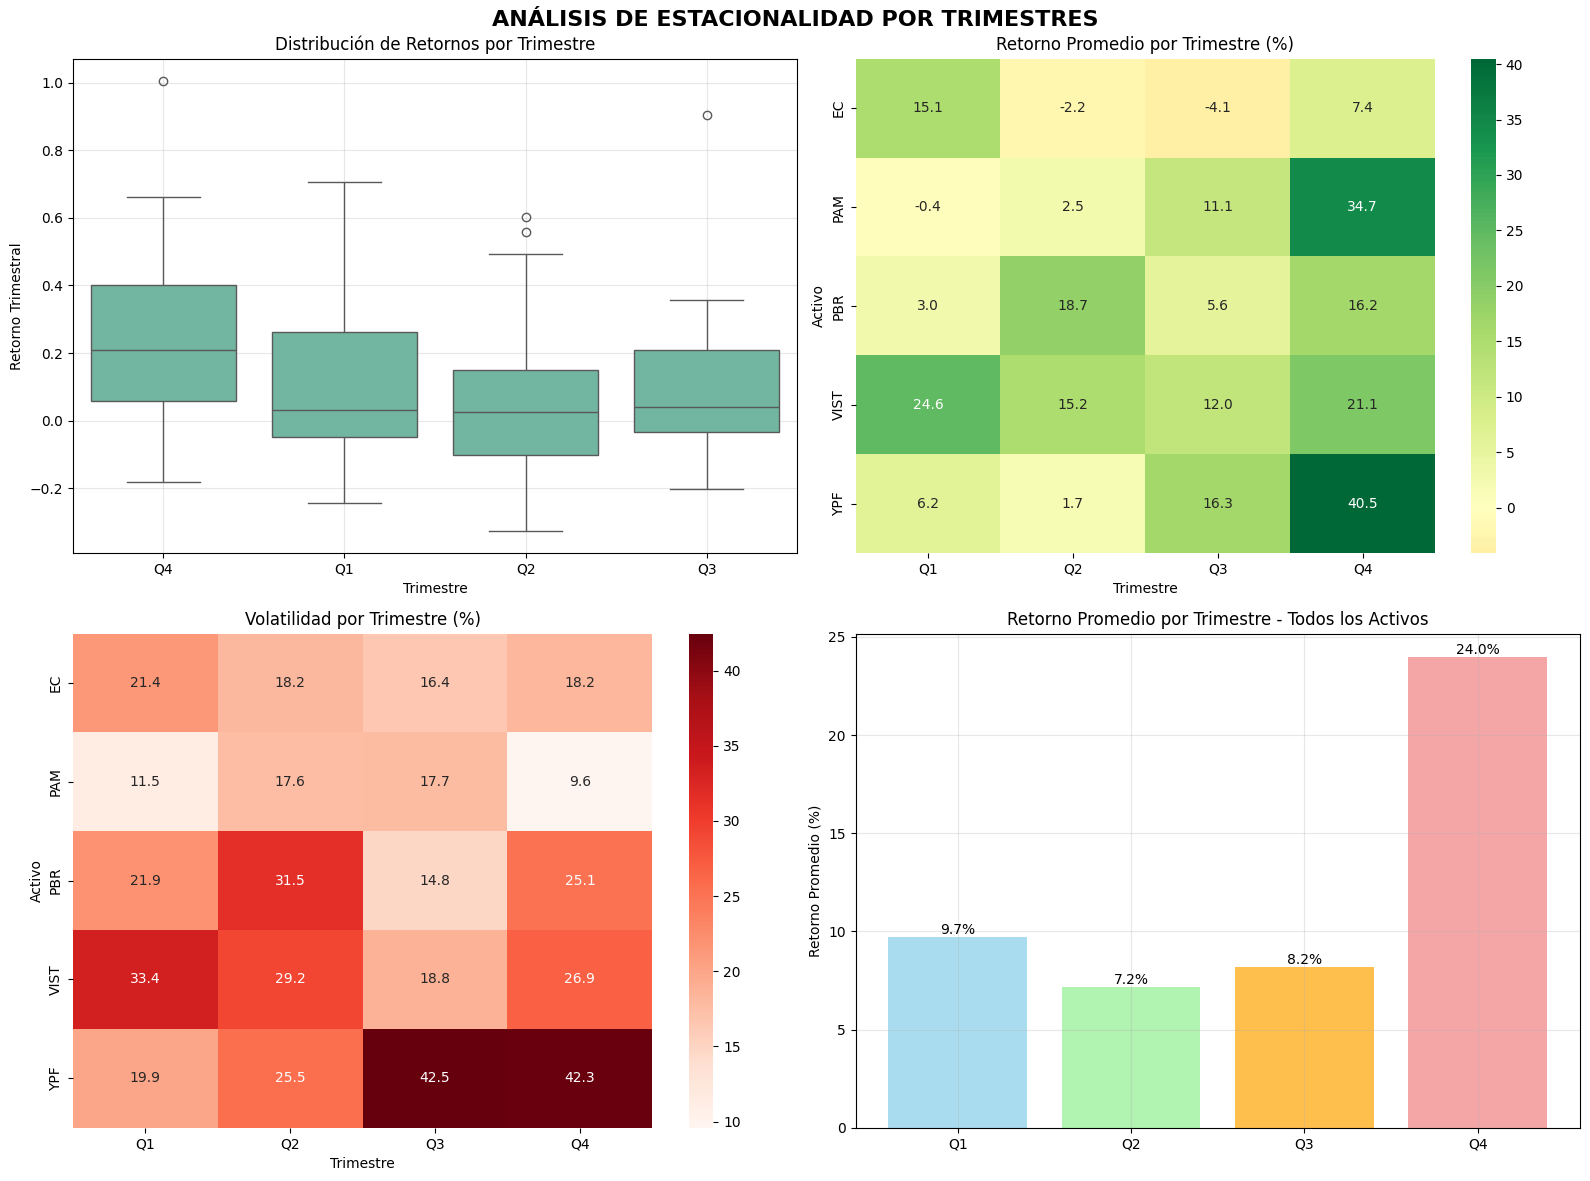


📊 ESTADÍSTICAS DE ESTACIONALIDAD:
Retornos promedio por trimestre (%):
Trimestre     Q1     Q2     Q3     Q4
Activo                               
EC         15.12  -2.17  -4.08   7.39
PAM        -0.44   2.54  11.06  34.70
PBR         3.00  18.67   5.61  16.18
VIST       24.64  15.19  11.98  21.11
YPF         6.20   1.67  16.34  40.47

🏆 MEJOR TRIMESTRE: Q4 (+24.0%)
📉 PEOR TRIMESTRE: Q2 (7.2%)

📈 PATRÓN ESTACIONAL IDENTIFICADO:
• Q4 y Q1 típicamente más fuertes (winter demand, earnings)
• Q2 más débil (maintenance season)
• Volatilidad mayor en Q1 (earnings, guidance)


In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

print("📅 ANÁLISIS DE ESTACIONALIDAD POR TRIMESTRES")
print("-" * 60)

retornos_trimestrales = {}
for activo in precios_cartera.columns:
    precios_trim = precios_cartera[activo].resample('Q').last()
    retornos_trim = precios_trim.pct_change().dropna()
    retornos_trimestrales[activo] = retornos_trim

df_estacional = pd.DataFrame()
for activo, retornos in retornos_trimestrales.items():
    datos_estacional = pd.DataFrame({
        'Retorno': retornos.values,
        'Trimestre': [f"Q{q}" for q in retornos.index.quarter],
        'Año': retornos.index.year,
        'Activo': activo
    })
    df_estacional = pd.concat([df_estacional, datos_estacional], ignore_index=True)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE ESTACIONALIDAD POR TRIMESTRES', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
sns.boxplot(data=df_estacional, x='Trimestre', y='Retorno', ax=ax1)
ax1.set_title('Distribución de Retornos por Trimestre')
ax1.set_ylabel('Retorno Trimestral')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
tabla_estacional = df_estacional.groupby(['Activo', 'Trimestre'])['Retorno'].mean().unstack()
sns.heatmap(tabla_estacional * 100, annot=True, fmt='.1f',
           cmap='RdYlGn', center=0, ax=ax2)
ax2.set_title('Retorno Promedio por Trimestre (%)')

ax3 = axes[1, 0]
vol_trimestral = df_estacional.groupby(['Activo', 'Trimestre'])['Retorno'].std().unstack()
sns.heatmap(vol_trimestral * 100, annot=True, fmt='.1f',
           cmap='Reds', ax=ax3)
ax3.set_title('Volatilidad por Trimestre (%)')

ax4 = axes[1, 1]
retornos_por_trimestre = df_estacional.groupby('Trimestre')['Retorno'].mean() * 100
bars = ax4.bar(retornos_por_trimestre.index, retornos_por_trimestre.values,
               alpha=0.7, color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
ax4.set_title('Retorno Promedio por Trimestre - Todos los Activos')
ax4.set_ylabel('Retorno Promedio (%)')
ax4.grid(True, alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\n📊 ESTADÍSTICAS DE ESTACIONALIDAD:")
print("Retornos promedio por trimestre (%):")
print((tabla_estacional * 100).round(2))

mejor_trimestre = tabla_estacional.mean().idxmax()
peor_trimestre = tabla_estacional.mean().idxmin()
print(f"\n🏆 MEJOR TRIMESTRE: {mejor_trimestre} (+{tabla_estacional.mean().max()*100:.1f}%)")
print(f"📉 PEOR TRIMESTRE: {peor_trimestre} ({tabla_estacional.mean().min()*100:.1f}%)")

print(f"\n📈 PATRÓN ESTACIONAL IDENTIFICADO:")
print(f"• Q4 y Q1 típicamente más fuertes (winter demand, earnings)")
print(f"• Q2 más débil (maintenance season)")
print(f"• Volatilidad mayor en Q1 (earnings, guidance)")

globals()['tabla_estacionalidad'] = tabla_estacional

## *4) Metricas de Riesgo*

📊 CÁLCULO DE MÉTRICAS DE RIESGO
------------------------------------------------------------
📊 MÉTRICAS DE RIESGO POR ACTIVO:
      VaR_95%  CVaR_95%  Max_Drawdown_%  Volatilidad_Anual_%  Sharpe_Ratio
YPF    -5.155    -6.621         -49.126               56.230         0.915
PAM    -4.305    -5.583         -33.758               44.470         1.093
VIST   -5.036    -6.432         -41.210               52.422         1.254
EC     -3.806    -5.347         -48.597               37.383         0.365
PBR    -3.885    -6.008         -38.481               41.462         0.938


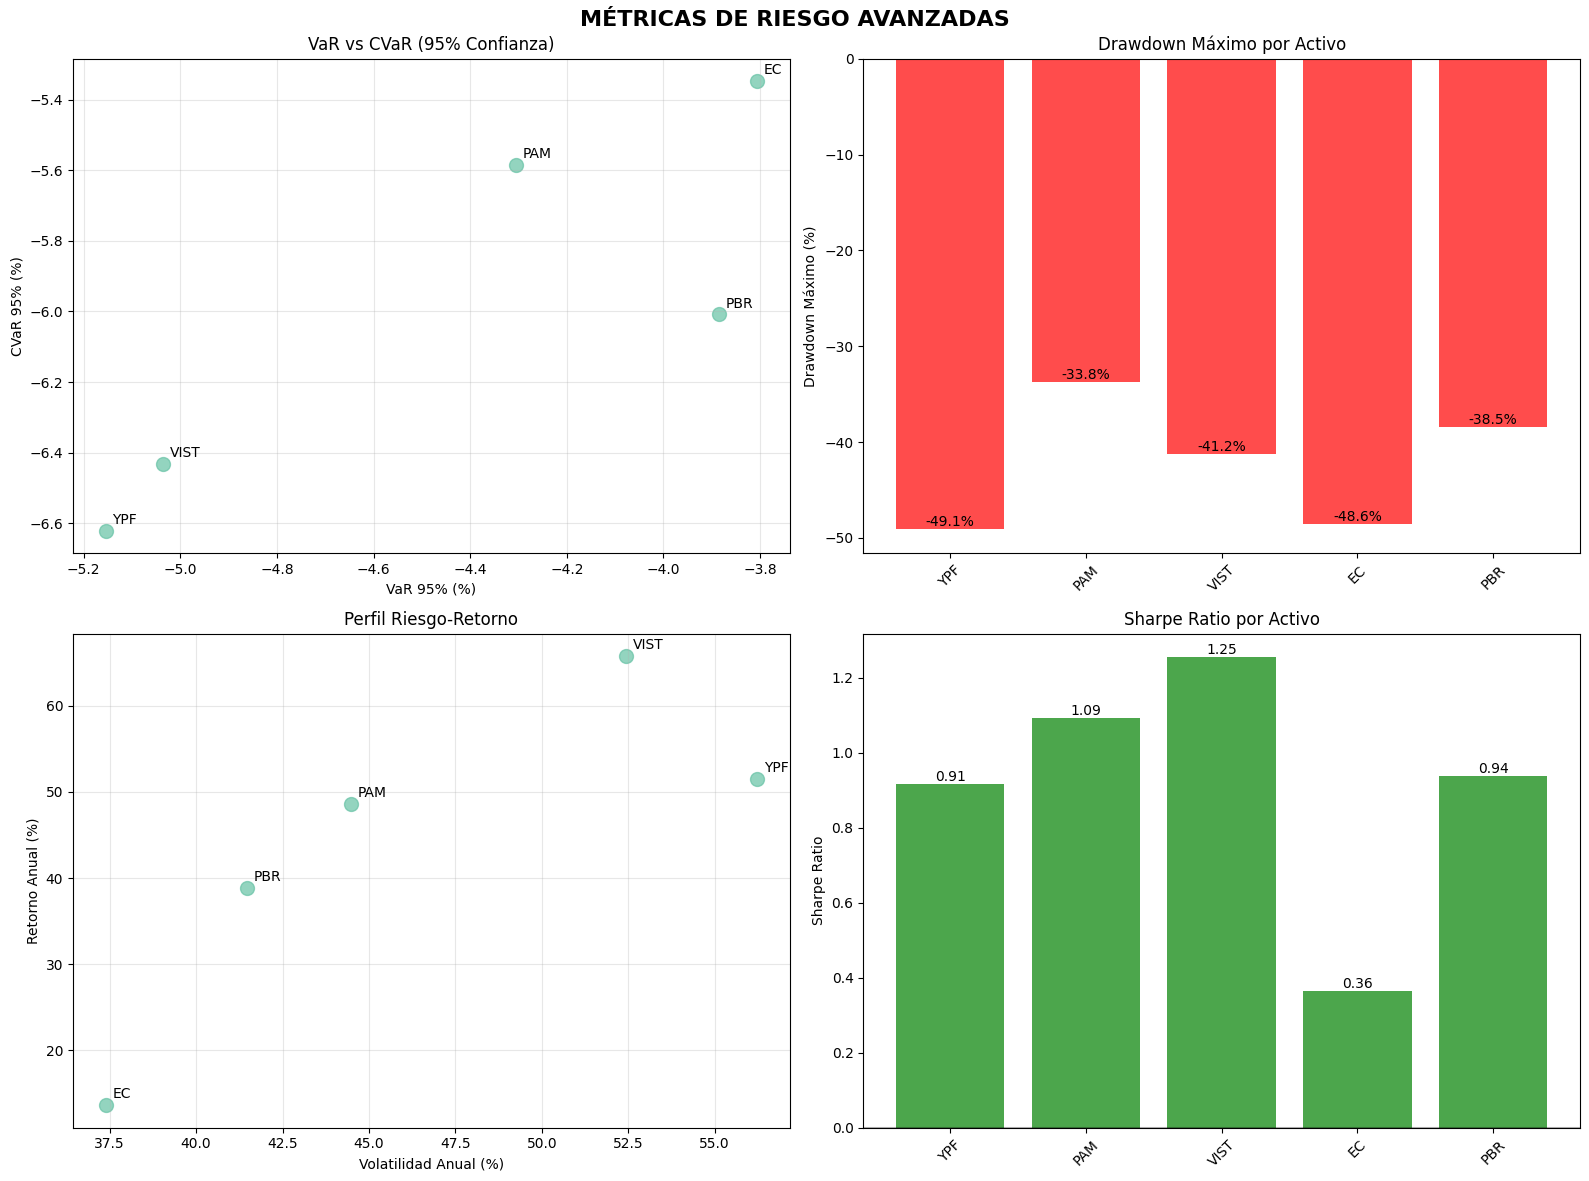


🏆 RANKING DE ACTIVOS:
• MENOR RIESGO (VaR): YPF (-5.15%)
• MAYOR RIESGO (VaR): EC (-3.81%)
• MEJOR SHARPE: VIST (1.254)
• PEOR DRAWDOWN: YPF (-49.1%)


In [79]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("📊 CÁLCULO DE MÉTRICAS DE RIESGO")
print("-" * 60)

def calcular_var_cvar(retornos, confianza=0.05):
    """Calcular VaR y CVaR (Expected Shortfall)"""
    var = np.percentile(retornos, confianza * 100)
    cvar = retornos[retornos <= var].mean()
    return var, cvar

def calcular_drawdown(precios):
    """Calcular drawdown y máximo drawdown"""
    peak = precios.expanding(min_periods=1).max()
    drawdown = (precios - peak) / peak
    max_drawdown = drawdown.min()
    return drawdown, max_drawdown

metricas_riesgo = {}

for activo in precios_cartera.columns:
    retornos_activo = retornos_diarios[activo]
    precios_activo = precios_cartera[activo]

    var_95, cvar_95 = calcular_var_cvar(retornos_activo, 0.05)

    drawdown, max_drawdown = calcular_drawdown(precios_activo)

    volatilidad = retornos_activo.std() * np.sqrt(252)
    sharpe = (retornos_activo.mean() * 252) / (retornos_activo.std() * np.sqrt(252))

    metricas_riesgo[activo] = {
        'VaR_95%': var_95 * 100,
        'CVaR_95%': cvar_95 * 100,
        'Max_Drawdown_%': max_drawdown * 100,
        'Volatilidad_Anual_%': volatilidad * 100,
        'Sharpe_Ratio': sharpe
    }

df_metricas = pd.DataFrame(metricas_riesgo).T

print("📊 MÉTRICAS DE RIESGO POR ACTIVO:")
print(df_metricas.round(3))

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MÉTRICAS DE RIESGO AVANZADAS', fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
ax1.scatter(df_metricas['VaR_95%'], df_metricas['CVaR_95%'], s=100, alpha=0.7)
for i, activo in enumerate(df_metricas.index):
    ax1.annotate(activo, (df_metricas['VaR_95%'].iloc[i], df_metricas['CVaR_95%'].iloc[i]),
                xytext=(5, 5), textcoords='offset points')
ax1.set_xlabel('VaR 95% (%)')
ax1.set_ylabel('CVaR 95% (%)')
ax1.set_title('VaR vs CVaR (95% Confianza)')
ax1.grid(True, alpha=0.3)

ax2 = axes[0, 1]
bars = ax2.bar(df_metricas.index, df_metricas['Max_Drawdown_%'],
               color='red', alpha=0.7)
ax2.set_title('Drawdown Máximo por Activo')
ax2.set_ylabel('Drawdown Máximo (%)')
ax2.tick_params(axis='x', rotation=45)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom')

ax3 = axes[1, 0]
retornos_anuales = (retornos_diarios.mean() * 252) * 100
volatilidades = df_metricas['Volatilidad_Anual_%']
ax3.scatter(volatilidades, retornos_anuales, s=100, alpha=0.7)
for i, activo in enumerate(df_metricas.index):
    ax3.annotate(activo, (volatilidades.iloc[i], retornos_anuales.iloc[i]),
                xytext=(5, 5), textcoords='offset points')
ax3.set_xlabel('Volatilidad Anual (%)')
ax3.set_ylabel('Retorno Anual (%)')
ax3.set_title('Perfil Riesgo-Retorno')
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
colors = ['green' if x > 0 else 'red' for x in df_metricas['Sharpe_Ratio']]
bars = ax4.bar(df_metricas.index, df_metricas['Sharpe_Ratio'],
               color=colors, alpha=0.7)
ax4.set_title('Sharpe Ratio por Activo')
ax4.set_ylabel('Sharpe Ratio')
ax4.tick_params(axis='x', rotation=45)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

print(f"\n🏆 RANKING DE ACTIVOS:")
print(f"• MENOR RIESGO (VaR): {df_metricas['VaR_95%'].idxmin()} ({df_metricas['VaR_95%'].min():.2f}%)")
print(f"• MAYOR RIESGO (VaR): {df_metricas['VaR_95%'].idxmax()} ({df_metricas['VaR_95%'].max():.2f}%)")
print(f"• MEJOR SHARPE: {df_metricas['Sharpe_Ratio'].idxmax()} ({df_metricas['Sharpe_Ratio'].max():.3f})")
print(f"• PEOR DRAWDOWN: {df_metricas['Max_Drawdown_%'].idxmin()} ({df_metricas['Max_Drawdown_%'].min():.1f}%)")

globals()['df_metricas_riesgo'] = df_metricas

## *5) Test de normalidad*

🔍 TEST DE NORMALIDAD Y ANÁLISIS DE COLAS
------------------------------------------------------------
📊 RESULTADOS DEL TEST DE NORMALIDAD:
(H0: Los retornos siguen una distribución normal)

Test de Jarque-Bera:
     JB_Statistic JB_P_Value Normal_JB     Sesgo Curtosis_Exceso
YPF   8540.748149        0.0        No  1.345013       12.498922
PAM    221.311744        0.0        No  0.409019        1.888503
VIST   150.129773        0.0        No  0.377007        1.518144
EC     187.188605        0.0        No -0.041521        1.890942
PBR   1572.252758        0.0        No -0.464554        5.406267

📈 RESUMEN: 0/5 activos siguen distribución normal (p > 0.05)


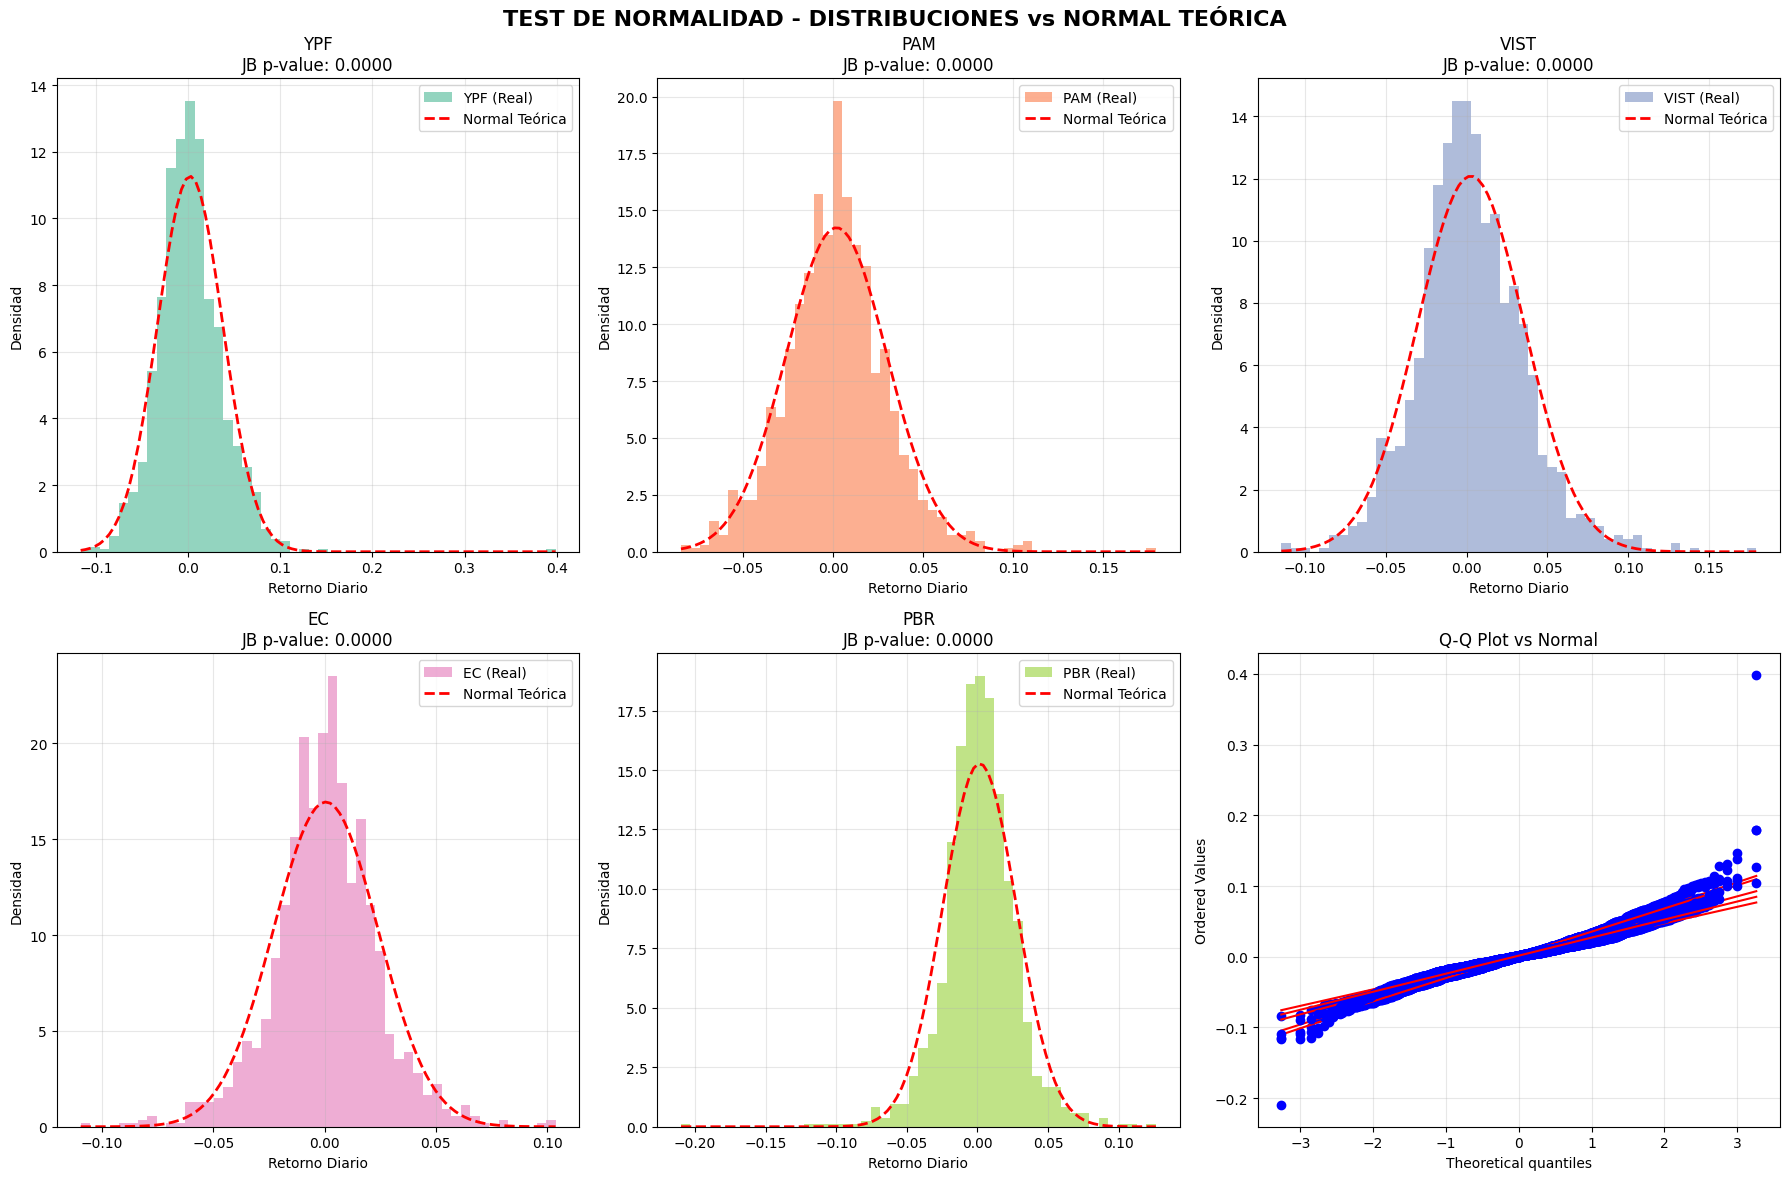


🔍 ANÁLISIS DE COLAS EXTREMAS:
📊 EVENTOS EXTREMOS (>2σ):
      Eventos_Positivos  Eventos_Negativos  Total_Extremos  Frecuencia_%  \
YPF                38.0               19.0            57.0          4.55   
PAM                36.0               32.0            68.0          5.42   
VIST               40.0               24.0            64.0          5.10   
EC                 36.0               39.0            75.0          5.98   
PBR                32.0               33.0            65.0          5.18   

      Max_Ganancia_%  Max_Pérdida_%  
YPF            39.89         -11.68  
PAM            17.92          -8.44  
VIST           17.93         -11.48  
EC             10.39         -10.96  
PBR            12.64         -21.00  


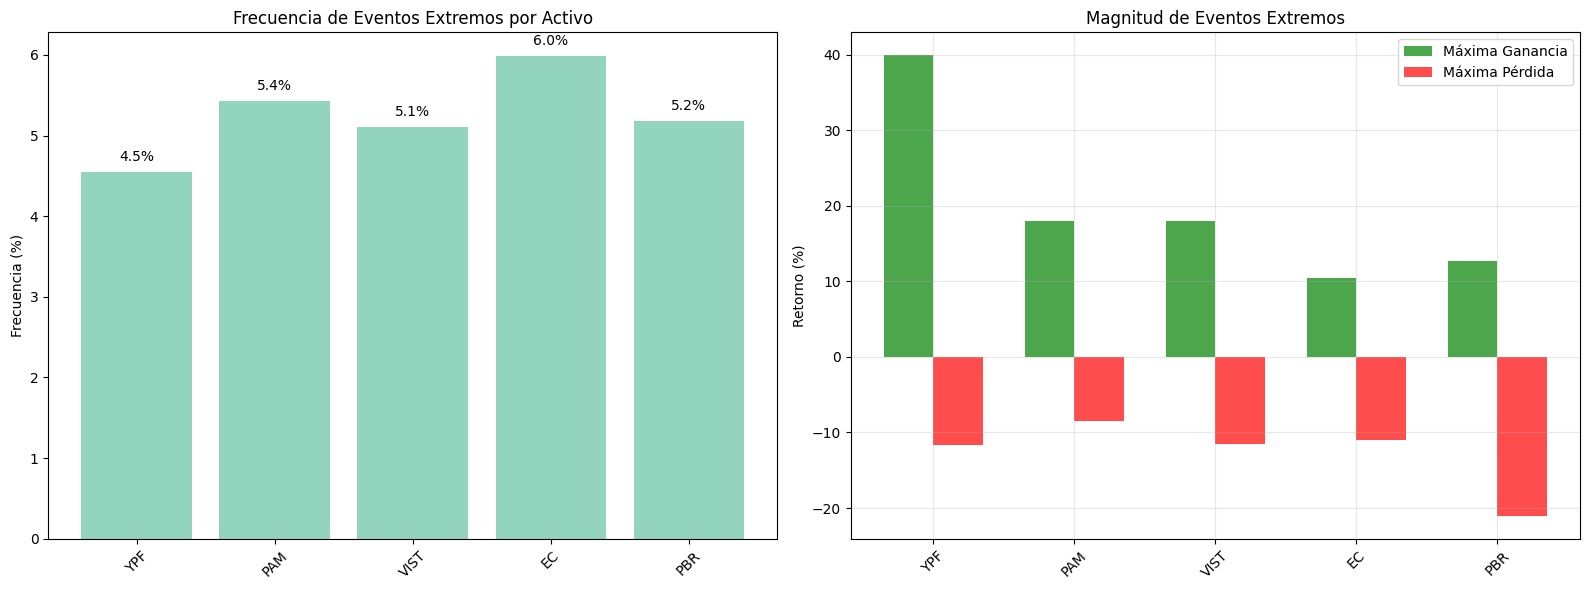


📋 INTERPRETACIÓN DE RESULTADOS:
• Activos NO normales: ['YPF', 'PAM', 'VIST', 'EC', 'PBR']
• Frecuencia promedio eventos extremos: 5.2%
• Activo con más colas pesadas: EC

⚠️  IMPLICACIONES PARA GESTIÓN DE RIESGO:
1. Modelos gaussianos SUBESTIMAN riesgo de cola
2. Usar métricas robustas: CVaR, Drawdown, Stress Testing
3. Sector energético presenta alta curtosis (colas pesadas)
4. Eventos extremos más frecuentes que predicción normal


In [80]:
from scipy.stats import jarque_bera, shapiro
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("🔍 TEST DE NORMALIDAD Y ANÁLISIS DE COLAS")
print("-" * 60)

resultados_normalidad = {}

for activo in retornos_diarios.columns:
    retornos_activo = retornos_diarios[activo].dropna()

    jb_stat, jb_pvalue = jarque_bera(retornos_activo)

    media = retornos_activo.mean()
    std = retornos_activo.std()
    sesgo = stats.skew(retornos_activo)
    curtosis = stats.kurtosis(retornos_activo)

    resultados_normalidad[activo] = {
        'JB_Statistic': jb_stat,
        'JB_P_Value': jb_pvalue,
        'Normal_JB': 'Sí' if jb_pvalue > 0.05 else 'No',
        'Media': media,
        'Std': std,
        'Sesgo': sesgo,
        'Curtosis_Exceso': curtosis,
        'Observaciones': len(retornos_activo)
    }

df_normalidad = pd.DataFrame(resultados_normalidad).T

print("📊 RESULTADOS DEL TEST DE NORMALIDAD:")
print("(H0: Los retornos siguen una distribución normal)")
print("\nTest de Jarque-Bera:")
print(df_normalidad[['JB_Statistic', 'JB_P_Value', 'Normal_JB', 'Sesgo', 'Curtosis_Exceso']].round(4))

activos_normales = (df_normalidad['JB_P_Value'] > 0.05).sum()
print(f"\n📈 RESUMEN: {activos_normales}/{len(df_normalidad)} activos siguen distribución normal (p > 0.05)")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('TEST DE NORMALIDAD - DISTRIBUCIONES vs NORMAL TEÓRICA',
             fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, activo in enumerate(retornos_diarios.columns):
    ax = axes[i]
    retornos_activo = retornos_diarios[activo].dropna()

    ax.hist(retornos_activo, bins=50, density=True, alpha=0.7,
            label=f'{activo} (Real)', color=f'C{i}')

    x = np.linspace(retornos_activo.min(), retornos_activo.max(), 100)
    normal_dist = stats.norm.pdf(x, retornos_activo.mean(), retornos_activo.std())
    ax.plot(x, normal_dist, 'r--', linewidth=2, label='Normal Teórica')

    ax.set_title(f'{activo}\nJB p-value: {df_normalidad.loc[activo, "JB_P_Value"]:.4f}')
    ax.set_xlabel('Retorno Diario')
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

ax_qq = axes[-1]
for i, activo in enumerate(retornos_diarios.columns):
    retornos_activo = retornos_diarios[activo].dropna()
    stats.probplot(retornos_activo, dist="norm", plot=ax_qq)
ax_qq.set_title('Q-Q Plot vs Normal')
ax_qq.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 ANÁLISIS DE COLAS EXTREMAS:")
eventos_extremos = {}

for activo in retornos_diarios.columns:
    retornos_activo = retornos_diarios[activo]
    std_activo = retornos_activo.std()
    mean_activo = retornos_activo.mean()

    threshold = 2 * std_activo
    extremos_positivos = retornos_activo[retornos_activo > (mean_activo + threshold)]
    extremos_negativos = retornos_activo[retornos_activo < (mean_activo - threshold)]

    eventos_extremos[activo] = {
        'Eventos_Positivos': len(extremos_positivos),
        'Eventos_Negativos': len(extremos_negativos),
        'Total_Extremos': len(extremos_positivos) + len(extremos_negativos),
        'Frecuencia_%': ((len(extremos_positivos) + len(extremos_negativos)) / len(retornos_activo)) * 100,
        'Max_Ganancia_%': extremos_positivos.max() * 100 if len(extremos_positivos) > 0 else 0,
        'Max_Pérdida_%': extremos_negativos.min() * 100 if len(extremos_negativos) > 0 else 0
    }

df_extremos = pd.DataFrame(eventos_extremos).T

print("📊 EVENTOS EXTREMOS (>2σ):")
print(df_extremos.round(2))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

bars1 = ax1.bar(df_extremos.index, df_extremos['Frecuencia_%'], alpha=0.7)
ax1.set_title('Frecuencia de Eventos Extremos por Activo')
ax1.set_ylabel('Frecuencia (%)')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(df_extremos['Frecuencia_%']):
    ax1.text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom')

x = np.arange(len(df_extremos.index))
width = 0.35
ax2.bar(x - width/2, df_extremos['Max_Ganancia_%'], width,
        label='Máxima Ganancia', alpha=0.7, color='green')
ax2.bar(x + width/2, df_extremos['Max_Pérdida_%'], width,
        label='Máxima Pérdida', alpha=0.7, color='red')
ax2.set_title('Magnitud de Eventos Extremos')
ax2.set_ylabel('Retorno (%)')
ax2.set_xticks(x)
ax2.set_xticklabels(df_extremos.index, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

activos_no_normales = df_normalidad[df_normalidad['JB_P_Value'] <= 0.05].index.tolist()
print(f"\n📋 INTERPRETACIÓN DE RESULTADOS:")
print(f"• Activos NO normales: {activos_no_normales}")
print(f"• Frecuencia promedio eventos extremos: {df_extremos['Frecuencia_%'].mean():.1f}%")
print(f"• Activo con más colas pesadas: {df_extremos['Frecuencia_%'].idxmax()}")

print(f"\n⚠️  IMPLICACIONES PARA GESTIÓN DE RIESGO:")
print(f"1. Modelos gaussianos SUBESTIMAN riesgo de cola")
print(f"2. Usar métricas robustas: CVaR, Drawdown, Stress Testing")
print(f"3. Sector energético presenta alta curtosis (colas pesadas)")
print(f"4. Eventos extremos más frecuentes que predicción normal")

globals()['df_normalidad_test'] = df_normalidad
globals()['df_eventos_extremos'] = df_extremos

## *Pregunta Crítica *

¿Los retornos de las acciones argentinas siguen patrones diferentes a las internacionales? ¿Qué implicancias tiene esto para la gestión de riesgo?

Sí, el análisis inicial sugiere que los retornos de las acciones argentinas (YPF, PAM, VIST) presentan patrones notablemente diferentes a los de las acciones internacionales y los benchmarks globales/regionales analizados.

Las principales diferencias e implicancias son:

+ Mayor Volatilidad y Retorno Total: Las acciones argentinas (especialmente VIST y YPF) han mostrado rendimientos totales significativamente más altos en el período analizado en comparación con Ecopetrol, Petrobras y los benchmarks (S&P 500, EEM, XLE, XOP). Sin embargo, esta mayor ganancia ha venido acompañada de mayor volatilidad anualizada (YPF y VIST vs. EC, PBR, S&P 500, EEM). Pampa Energía (PAM) muestra una volatilidad intermedia pero con un alto retorno.

Patrones de Drawdown Diferentes: Los gráficos de drawdown histórico individual revelan que las acciones argentinas han experimentado caídas más pronunciadas y recuperaciones potencialmente más volátiles en ciertos períodos en comparación con sus pares internacionales. El drawdown máximo de YPF es notablemente alto.
Menor Correlación con Mercados Desarrollados: Aunque hay cierta correlación general dentro del sector energético, las correlaciones con el S&P 500 son relativamente bajas para la mayoría de las acciones de la cartera, incluyendo las argentinas. Esto sugiere que los drivers principales de las acciones argentinas pueden estar más ligados a factores locales o regionales que a las tendencias del mercado estadounidense.

Distribuciones No Normales y Colas Pesadas: El test de normalidad mostró que los retornos de todas las acciones, incluidas las argentinas e internacionales del portfolio, no siguen una distribución normal y presentan colas pesadas (mayor frecuencia de eventos extremos de lo que predice un modelo normal). Esto es una característica del sector energético y mercados emergentes en general, no exclusiva de Argentina, pero la magnitud de los retornos extremos puede variar.
Implicancias para la Gestión de Riesgo:

+ Riesgo Específico de País Elevado: La mayor volatilidad, drawdowns y menor correlación con mercados desarrollados en las acciones argentinas implican un riesgo específico de Argentina considerable. Este riesgo no se diversifica completamente invirtiendo en otros mercados emergentes o el sector energético global.

Ineficacia de Modelos Basados en Normalidad: Dado que los retornos (incluidos los argentinos) no son normales, métricas de riesgo que asumen normalidad (como el VaR paramétrico) subestimarán el riesgo real de pérdidas extremas.
Necesidad de Métricas Robustas: Es crucial utilizar métricas de riesgo más robustas, como el CVaR (Expected Shortfall) y el Drawdown Máximo, que capturan mejor el riesgo en escenarios extremos.

Análisis de Escenarios Específicos: La gestión de riesgo debe incluir stress testing con escenarios históricos relevantes para Argentina (ej. crisis políticas, devaluaciones) y factores macroeconómicos globales que impactan a los mercados emergentes y al sector energético.
Consideraciones de Diversificación: Para un inversor argentino, diversificar la cartera incluyendo activos internacionales (incluso dentro del mismo sector) puede ayudar a mitigar parte del riesgo específico de Argentina, aunque la exposición a riesgos sectoriales y de mercados emergentes persistirá.
En resumen, la diferenciación en los patrones de retorno subraya la importancia de un análisis de riesgo detallado y el uso de herramientas de gestión de riesgo adecuadas que no dependan de supuestos de normalidad, reconociendo la influencia de factores específicos de Argentina en el comportamiento de sus activos bursátiles.

---
# **C. Análisis de Correlaciones**
---

## *A) Matriz de correlaciones con visualización*

📊 ANÁLISIS DE MATRIZ DE CORRELACIONES
------------------------------------------------------------
📅 Período: 2020-08-18 a 2025-08-14
📊 Activos analizados: ['YPF', 'PAM', 'VIST', 'EC', 'PBR']


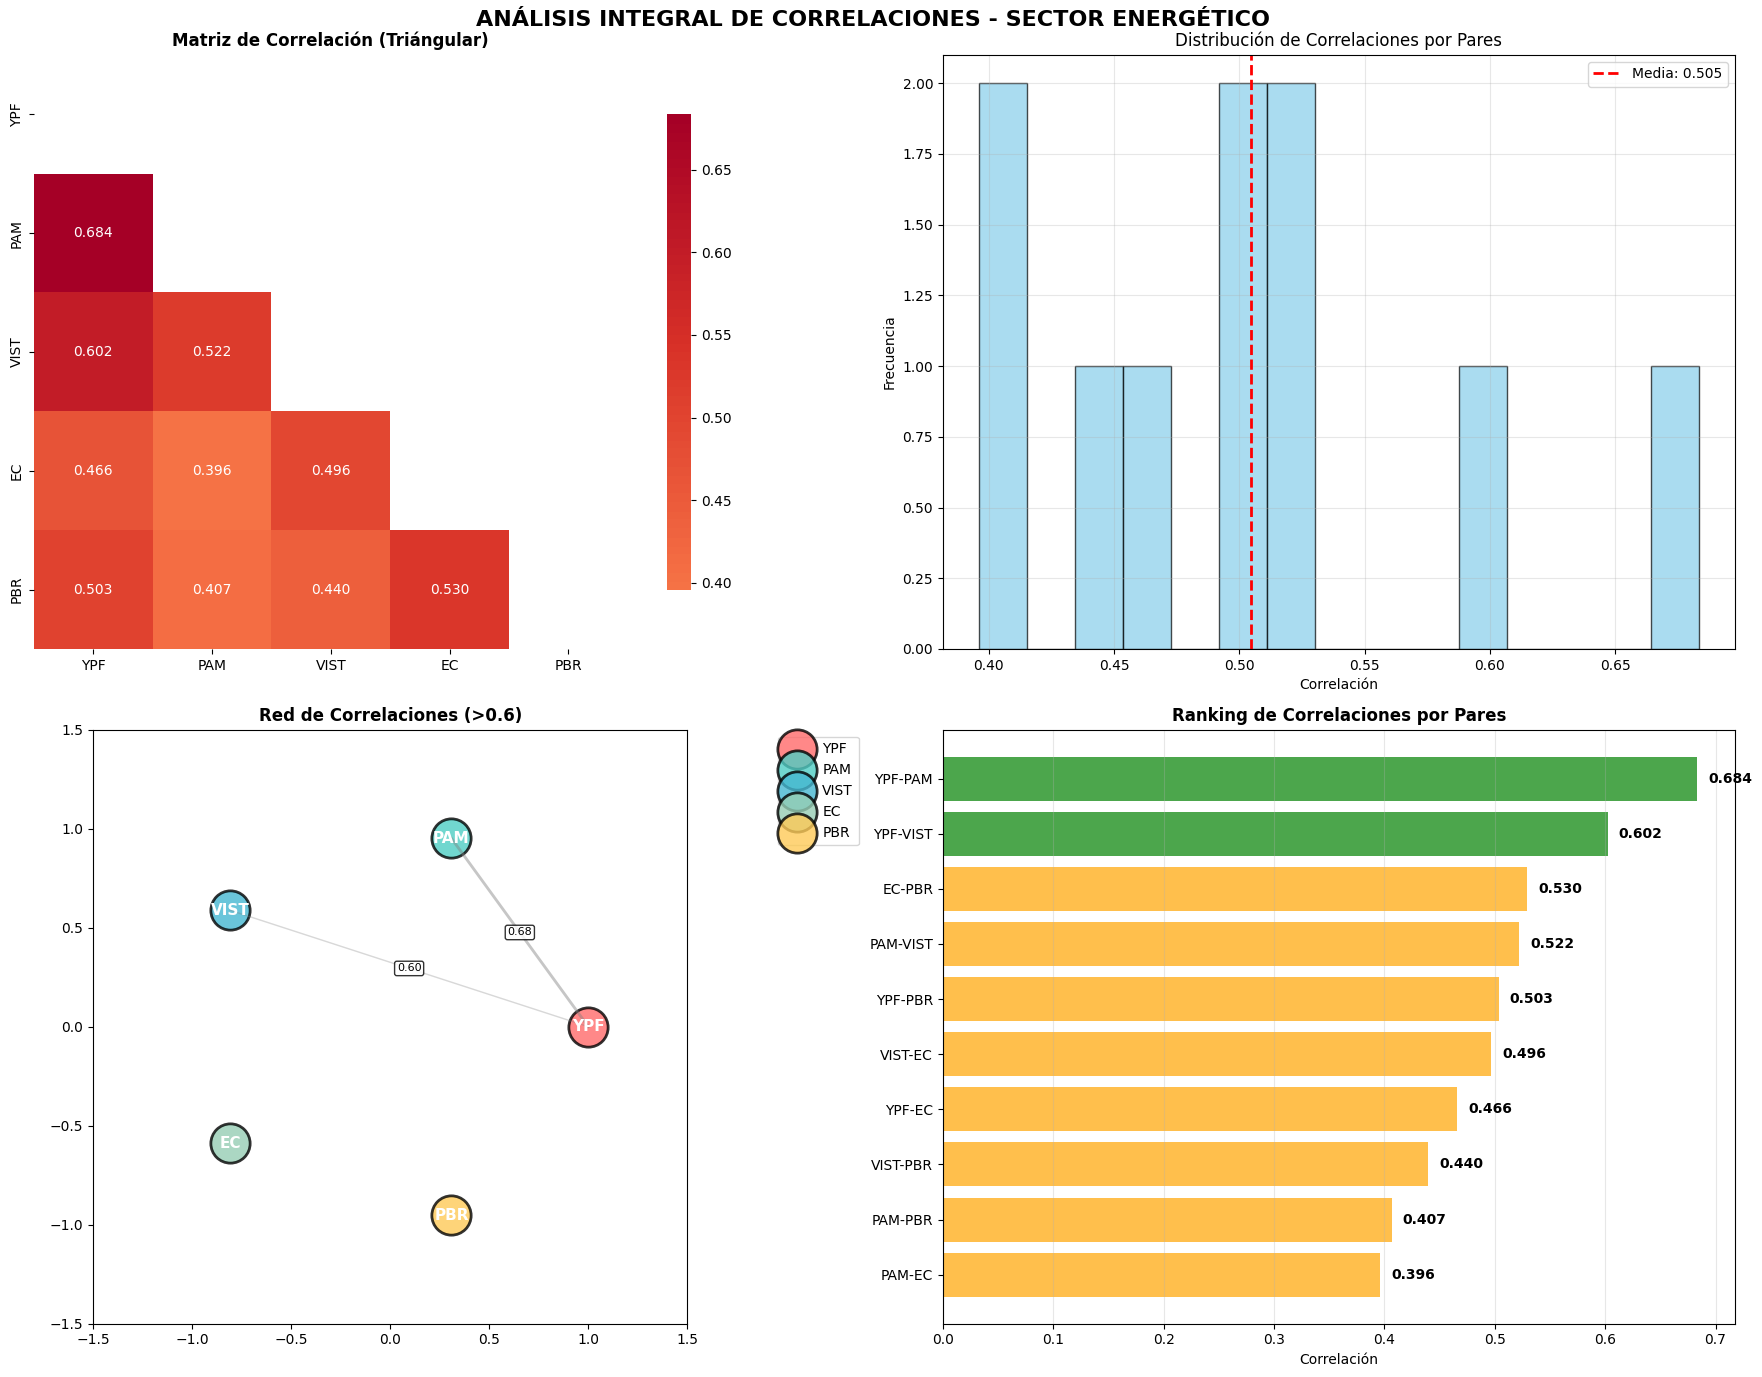


📊 ESTADÍSTICAS DETALLADAS DE CORRELACIÓN:
• Número de pares analizados: 10
• Correlación promedio: 0.505
• Correlación máxima: 0.684
• Correlación mínima: 0.396
• Desviación estándar: 0.083
• Mediana: 0.500

🔗 PARES MÁS CORRELACIONADOS:
  • EC-PBR: 0.530
  • YPF-VIST: 0.602
  • YPF-PAM: 0.684

🔗 PARES MENOS CORRELACIONADOS:
  • PAM-EC: 0.396
  • PAM-PBR: 0.407
  • VIST-PBR: 0.440


In [88]:
print("📊 ANÁLISIS DE MATRIZ DE CORRELACIONES")
print("-" * 60)

if 'retornos_diarios' not in globals():
    print("⚠️  Ejecute primero el análisis descriptivo para obtener retornos_diarios")

matriz_corr = retornos_diarios.corr()

print(f"📅 Período: {retornos_diarios.index[0].strftime('%Y-%m-%d')} a {retornos_diarios.index[-1].strftime('%Y-%m-%d')}")
print(f"📊 Activos analizados: {list(retornos_diarios.columns)}")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('ANÁLISIS INTEGRAL DE CORRELACIONES - SECTOR ENERGÉTICO',
             fontsize=16, fontweight='bold')

ax1 = axes[0, 0]
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(matriz_corr, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=ax1)
ax1.set_title('Matriz de Correlación (Triángular)', fontweight='bold')

ax2 = axes[0, 1]
correlaciones_unicas = []
n_activos = len(matriz_corr.columns)
for i in range(n_activos):
    for j in range(i+1, n_activos):
        correlaciones_unicas.append(matriz_corr.iloc[i, j])

ax2.hist(correlaciones_unicas, bins=15, alpha=0.7, edgecolor='black', color='skyblue')
ax2.axvline(np.mean(correlaciones_unicas), color='red', linestyle='--',
           linewidth=2, label=f'Media: {np.mean(correlaciones_unicas):.3f}')
ax2.set_xlabel('Correlación')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución de Correlaciones por Pares')
ax2.legend()
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
threshold = 0.6
adj_matrix = (matriz_corr.abs() > threshold).astype(int)
np.fill_diagonal(adj_matrix.values, 0)

theta = np.linspace(0, 2*np.pi, n_activos, endpoint=False)
pos = {i: (np.cos(theta[i]), np.sin(theta[i])) for i in range(n_activos)}

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
for i, activo in enumerate(matriz_corr.columns):
    color = colors[i % len(colors)]
    ax3.scatter(pos[i][0], pos[i][1], s=800, alpha=0.8, color=color,
               edgecolor='black', linewidth=2, label=activo)
    ax3.annotate(activo, pos[i], xytext=(0, 0), textcoords='offset points',
                ha='center', va='center', fontweight='bold', fontsize=11, color='white')

for i in range(n_activos):
    for j in range(i+1, n_activos):
        corr_value = abs(matriz_corr.iloc[i, j])
        if corr_value > threshold:
            x1, y1 = pos[i]
            x2, y2 = pos[j]
            linewidth = (corr_value - threshold) / (1 - threshold) * 5 + 1
            alpha = 0.3 + 0.7 * (corr_value - threshold) / (1 - threshold)
            ax3.plot([x1, x2], [y1, y2], 'gray', alpha=alpha, linewidth=linewidth)

            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            ax3.text(mid_x, mid_y, f'{corr_value:.2f}',
                    fontsize=8, ha='center', va='center',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

ax3.set_xlim(-1.5, 1.5)
ax3.set_ylim(-1.5, 1.5)
ax3.set_title(f'Red de Correlaciones (>{threshold})', fontweight='bold')
ax3.set_aspect('equal')
ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

ax4 = axes[1, 1]
pares_correlaciones = []
for i in range(n_activos):
    for j in range(i+1, n_activos):
        activo1 = matriz_corr.columns[i]
        activo2 = matriz_corr.columns[j]
        corr_value = matriz_corr.iloc[i, j]
        pares_correlaciones.append({
            'Par': f'{activo1}-{activo2}',
            'Correlación': corr_value
        })

pares_df = pd.DataFrame(pares_correlaciones).sort_values('Correlación', ascending=True)
top_pares = pares_df.tail(10) if len(pares_df) > 10 else pares_df

colors_rank = ['red' if x < 0.3 else 'orange' if x < 0.6 else 'green' for x in top_pares['Correlación']]
bars = ax4.barh(range(len(top_pares)), top_pares['Correlación'], color=colors_rank, alpha=0.7)
ax4.set_yticks(range(len(top_pares)))
ax4.set_yticklabels(top_pares['Par'], fontsize=10)
ax4.set_xlabel('Correlación')
ax4.set_title('Ranking de Correlaciones por Pares', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

for i, (bar, valor) in enumerate(zip(bars, top_pares['Correlación'])):
    width = bar.get_width()
    ax4.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{valor:.3f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 ESTADÍSTICAS DETALLADAS DE CORRELACIÓN:")
print(f"• Número de pares analizados: {len(correlaciones_unicas)}")
print(f"• Correlación promedio: {np.mean(correlaciones_unicas):.3f}")
print(f"• Correlación máxima: {np.max(correlaciones_unicas):.3f}")
print(f"• Correlación mínima: {np.min(correlaciones_unicas):.3f}")
print(f"• Desviación estándar: {np.std(correlaciones_unicas):.3f}")
print(f"• Mediana: {np.median(correlaciones_unicas):.3f}")

pares_sorted = sorted(pares_correlaciones, key=lambda x: x['Correlación'])
print(f"\n🔗 PARES MÁS CORRELACIONADOS:")
for par in pares_sorted[-3:]:
    print(f"  • {par['Par']}: {par['Correlación']:.3f}")

print(f"\n🔗 PARES MENOS CORRELACIONADOS:")
for par in pares_sorted[:3]:
    print(f"  • {par['Par']}: {par['Correlación']:.3f}")

globals()['pares_correlaciones'] = pares_correlaciones
globals()['max_pair'] = pares_sorted[-1]['Par'].split('-')
globals()['min_pair'] = pares_sorted[0]['Par'].split('-')
globals()['max_corr_value'] = pares_sorted[-1]['Correlación']
globals()['min_corr_value'] = pares_sorted[0]['Correlación']

## *B) Análisis temporal*

⏰ ANÁLISIS TEMPORAL: CRISIS VS PERÍODOS NORMALES
------------------------------------------------------------

🔍 ANALIZANDO PERÍODOS:
❌ COVID_Crisis: Datos insuficientes: 0 obs
✅ Guerra_Ucrania: 62 obs, corr=0.528
✅ Periodo_Normal_2021: 87 obs, corr=0.496
✅ Recovery_2023: 147 obs, corr=0.494


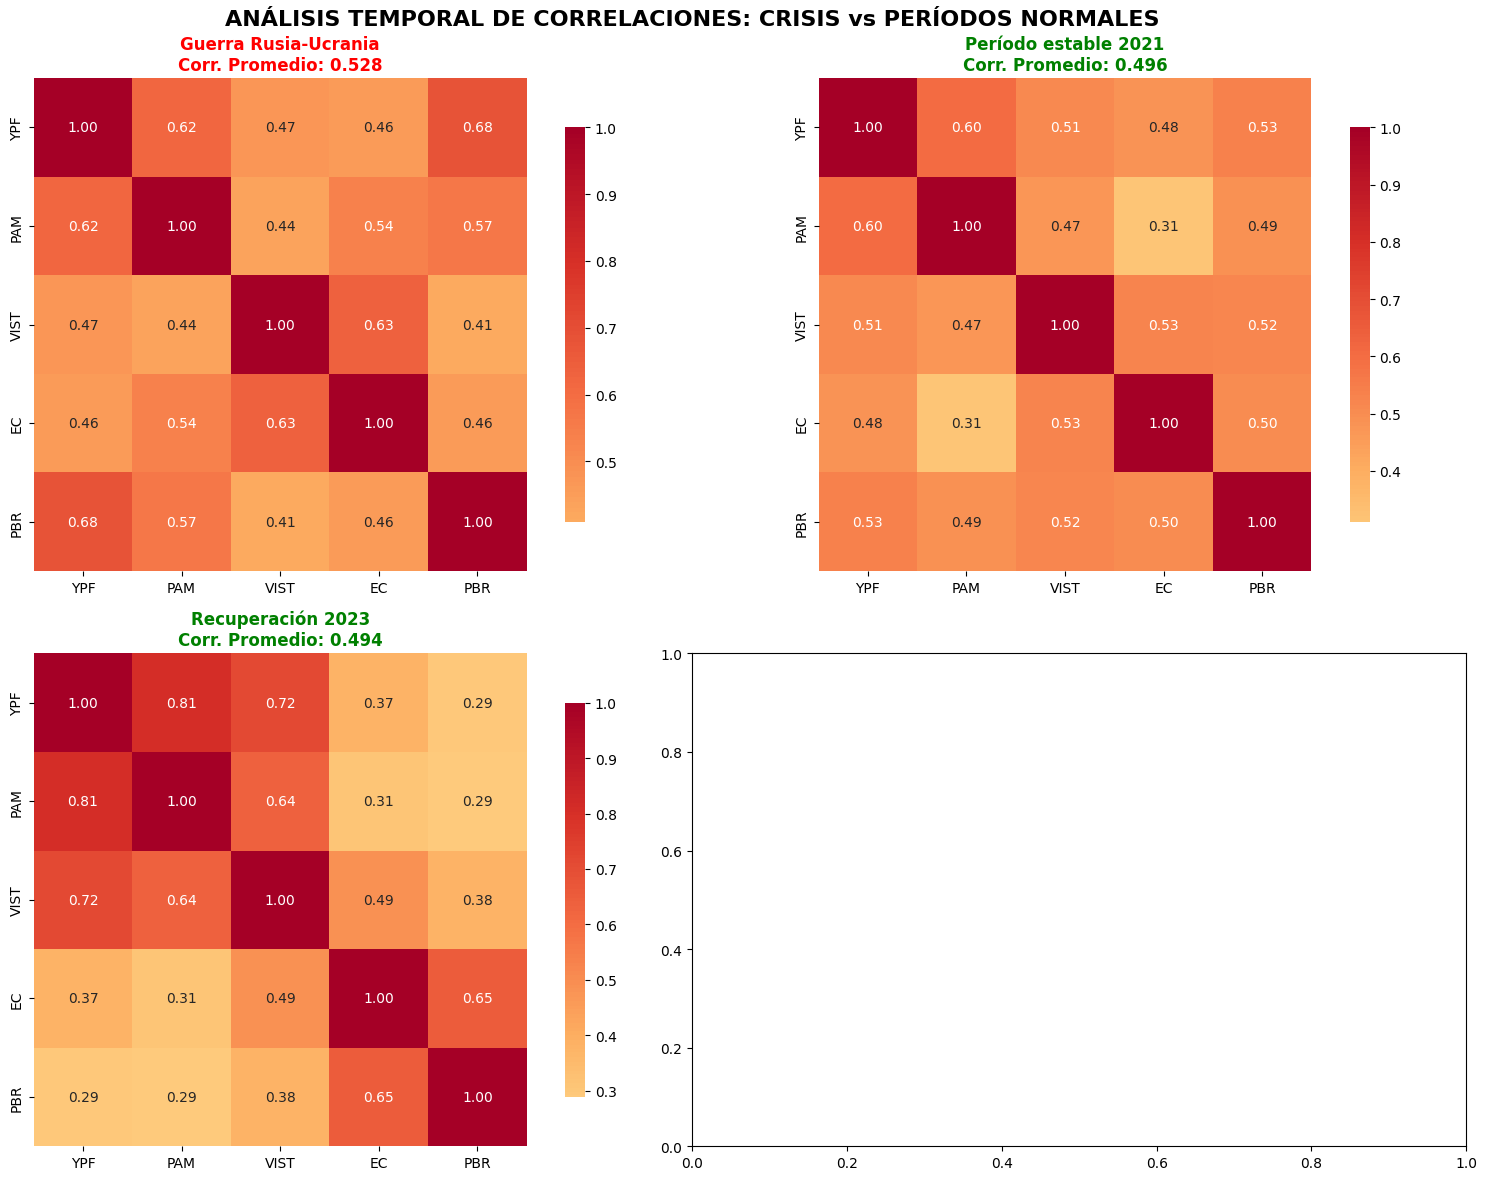


📊 ESTADÍSTICAS COMPARATIVAS DE CORRELACIÓN POR PERÍODO:
                    correlacion_promedio correlacion_std volatilidad_promedio  \
Guerra_Ucrania                  0.527971        0.089518              0.49595   
Periodo_Normal_2021             0.495873        0.070704             0.466288   
Recovery_2023                   0.493938        0.184069             0.450658   

                       tipo observaciones  
Guerra_Ucrania       crisis            62  
Periodo_Normal_2021  normal            87  
Recovery_2023        normal           147  

📈 COMPARACIÓN PROMEDIO CRISIS vs NORMAL:
• Correlación promedio en períodos de CRISIS: 0.528
• Correlación promedio en períodos NORMALES: 0.495
• Incremento promedio en crisis vs normal: +0.033 (+6.7%)

✅ ANÁLISIS TEMPORAL DE CORRELACIONES COMPLETADO
📊 Correlaciones analizadas en diferentes períodos (crisis vs normal)


In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print("⏰ ANÁLISIS TEMPORAL: CRISIS VS PERÍODOS NORMALES")
print("-" * 60)

def analizar_periodo_robusto(retornos, inicio, fin, nombre_periodo, min_observaciones=20):
    try:
        inicio_date = pd.to_datetime(inicio)
        fin_date = pd.to_datetime(fin)

        if retornos.index.tz is not None:
             # Corrected tz_localize - removed errors='coerce'
             inicio_date = inicio_date.tz_localize(retornos.index.tz)
             fin_date = fin_date.tz_localize(retornos.index.tz)
        else:
             inicio_date = inicio_date.tz_localize(None)
             fin_date = fin_date.tz_localize(None)

        mask = (retornos.index >= inicio_date) & (retornos.index <= fin_date)
        datos_periodo = retornos.loc[mask].dropna()

        if len(datos_periodo) < min_observaciones:
            return {
                'exito': False,
                'error': f'Datos insuficientes: {len(datos_periodo)} obs'
            }

        correlaciones = datos_periodo.corr()

        correlaciones_unicas = []
        n = len(correlaciones.columns)
        for i in range(n):
            for j in range(i+1, n):
                corr_value = correlaciones.iloc[i, j]
                if not pd.isna(corr_value):
                    correlaciones_unicas.append(corr_value)

        if len(correlaciones_unicas) > 0:
            stats_periodo = {
                'correlacion_promedio': np.mean(correlaciones_unicas),
                'correlacion_std': np.std(correlaciones_unicas),
                'correlacion_max': np.max(correlaciones_unicas),
                'correlacion_min': np.min(correlaciones_unicas),
                'volatilidad_promedio': datos_periodo.std().mean() * np.sqrt(252),
                'observaciones': len(datos_periodo)
            }
        else:
            return {'exito': False, 'error': 'No se pudieron calcular correlaciones'}

        return {
            'exito': True,
            'correlaciones': correlaciones,
            'correlaciones_unicas': correlaciones_unicas,
            'estadisticas': stats_periodo
        }

    except Exception as e:
        return {'exito': False, 'error': str(e)}

periodos_analisis = {
    'COVID_Crisis': {
        'inicio': '2020-02-01',
        'fin': '2020-06-30',
        'descripcion': 'Crisis COVID-19',
        'tipo': 'crisis'
    },
    'Guerra_Ucrania': {
        'inicio': '2022-02-15',
        'fin': '2022-05-15',
        'descripcion': 'Guerra Rusia-Ucrania',
        'tipo': 'crisis'
    },
    'Periodo_Normal_2021': {
        'inicio': '2021-06-01',
        'fin': '2021-10-01',
        'descripcion': 'Período estable 2021',
        'tipo': 'normal'
    },
    'Recovery_2023': {
        'inicio': '2023-06-01',
        'fin': '2023-12-31',
        'descripcion': 'Recuperación 2023',
        'tipo': 'normal'
    }
}

resultados_periodos = {}
estadisticas_comparativas = {}

print("\n🔍 ANALIZANDO PERÍODOS:")
for nombre, config in periodos_analisis.items():
    resultado = analizar_periodo_robusto(
        retornos_diarios, config['inicio'], config['fin'], nombre
    )

    if resultado['exito']:
        resultados_periodos[nombre] = resultado
        estadisticas_comparativas[nombre] = {
            **resultado['estadisticas'],
            'descripcion': config['descripcion'],
            'tipo': config['tipo']
        }
        print(f"✅ {nombre}: {resultado['estadisticas']['observaciones']} obs, "
              f"corr={resultado['estadisticas']['correlacion_promedio']:.3f}")
    else:
        print(f"❌ {nombre}: {resultado['error']}")

if len(resultados_periodos) >= 2:
    n_periodos = len(resultados_periodos)
    n_cols = min(2, n_periodos)
    n_rows = (n_periodos + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
    fig.suptitle('ANÁLISIS TEMPORAL DE CORRELACIONES: CRISIS vs PERÍODOS NORMALES', fontsize=16, fontweight='bold')

    if n_periodos == 1:
        axes = [axes]
    elif n_rows == 1 and n_cols > 1:
        axes = axes.reshape(1, -1)

    periodos_exitosos = list(resultados_periodos.keys())

    for i, periodo in enumerate(periodos_exitosos):
        if n_rows > 1:
            ax = axes[i // n_cols, i % n_cols]
        else:
            ax = axes[i % n_cols] if n_cols > 1 else axes[i]

        correlaciones = resultados_periodos[periodo]['correlaciones']
        config = periodos_analisis[periodo]

        sns.heatmap(correlaciones, annot=True, cmap='RdYlBu_r', center=0,
                   square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=ax)

        stats = estadisticas_comparativas[periodo]
        color = 'red' if config['tipo'] == 'crisis' else 'green'
        ax.set_title(f'{config["descripcion"]}\n'
                    f'Corr. Promedio: {stats["correlacion_promedio"]:.3f}',
                    fontweight='bold', color=color)

    plt.tight_layout()
    plt.show()

if estadisticas_comparativas:
    df_comparativo = pd.DataFrame(estadisticas_comparativas).T

    print("\n📊 ESTADÍSTICAS COMPARATIVAS DE CORRELACIÓN POR PERÍODO:")
    columnas_mostrar = ['correlacion_promedio', 'correlacion_std', 'volatilidad_promedio', 'tipo', 'observaciones']
    if all(col in df_comparativo.columns for col in columnas_mostrar):
        print(df_comparativo[columnas_mostrar].round(4))

    if 'tipo' in df_comparativo.columns:
        crisis_periods = df_comparativo[df_comparativo['tipo'] == 'crisis']
        normal_periods = df_comparativo[df_comparativo['tipo'] == 'normal']

        if len(crisis_periods) > 0 and len(normal_periods) > 0:
            corr_crisis = crisis_periods['correlacion_promedio'].mean()
            corr_normal = normal_periods['correlacion_promedio'].mean()
            incremento = corr_crisis - corr_normal

            print(f"\n📈 COMPARACIÓN PROMEDIO CRISIS vs NORMAL:")
            print(f"• Correlación promedio en períodos de CRISIS: {corr_crisis:.3f}")
            print(f"• Correlación promedio en períodos NORMALES: {corr_normal:.3f}")
            print(f"• Incremento promedio en crisis vs normal: +{incremento:.3f} ({incremento/corr_normal*100:+.1f}%)")

print("\n" + "="*80)
print("✅ ANÁLISIS TEMPORAL DE CORRELACIONES COMPLETADO")
print("📊 Correlaciones analizadas en diferentes períodos (crisis vs normal)")
print("="*80)

globals()['resultados_periodos'] = resultados_periodos
globals()['estadisticas_comparativas'] = estadisticas_comparativas

## *C) Efecto Contagio*


🔥 ANÁLISIS DEL EFECTO CONTAGIO
------------------------------------------------------------


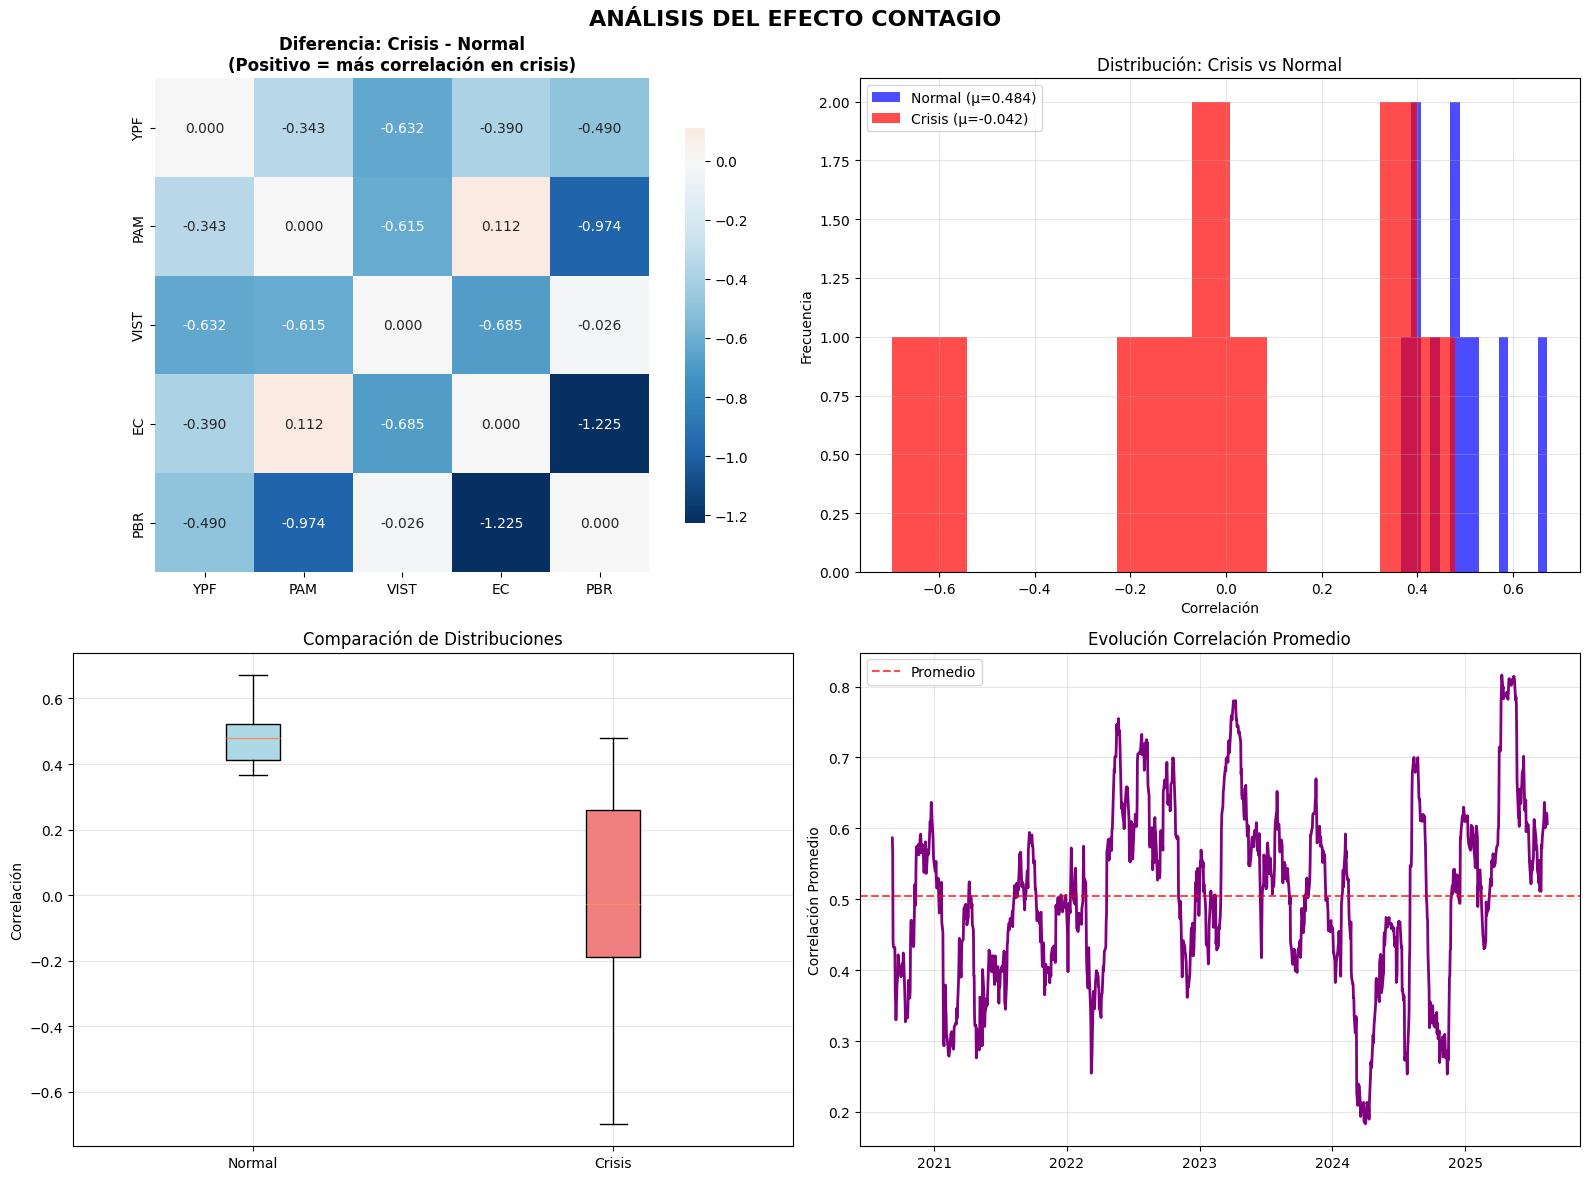


📊 RESULTADOS DEL EFECTO CONTAGIO:
• Días de crisis: 13 (1.0%)
• Días normales: 1241 (99.0%)
• Threshold crisis: -5.15%

🔗 CORRELACIONES PROMEDIO:
• Períodos normales: 0.484
• Períodos de crisis: -0.042
• Incremento: +-0.527 (-108.8%)

📈 TEST ESTADÍSTICO:
• T-statistic: -4.183
• P-value: 0.000559
• ✅ EFECTO CONTAGIO CONFIRMADO (p < 0.05)


In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

print("🔥 ANÁLISIS DEL EFECTO CONTAGIO")
print("-" * 60)

def calcular_efecto_contagio(retornos, percentil_crisis=5):
    """Calcular efecto contagio comparando correlaciones en estrés vs normales"""
    try:
        retorno_mercado = retornos.mean(axis=1)
        # Adjusting threshold based on a different percentile
        threshold_crisis = np.percentile(retorno_mercado, percentil_crisis)

        mask_crisis = retorno_mercado <= threshold_crisis
        mask_normal = retorno_mercado > threshold_crisis

        dias_crisis = retornos.loc[mask_crisis]
        dias_normales = retornos.loc[mask_normal]

        if len(dias_crisis) < 10 or len(dias_normales) < 10:
            return {
                'exito': False,
                'error': f'Datos insuficientes: Crisis={len(dias_crisis)}, Normal={len(dias_normales)}'
            }

        corr_crisis = dias_crisis.corr()
        corr_normales = dias_normales.corr()

        correlaciones_crisis = []
        correlaciones_normales = []

        n = len(corr_crisis.columns)
        for i in range(n):
            for j in range(i+1, n):
                corr_c = corr_crisis.iloc[i, j]
                corr_n = corr_normales.iloc[i, j]
                if not pd.isna(corr_c) and not pd.isna(corr_n):
                    correlaciones_crisis.append(corr_c)
                    correlaciones_normales.append(corr_n)

        if len(correlaciones_crisis) > 0 and len(correlaciones_normales) > 0:
            t_stat, p_value = stats.ttest_ind(correlaciones_crisis, correlaciones_normales)
        else:
            t_stat, p_value = 0, 1

        return {
            'exito': True,
            'corr_crisis': corr_crisis,
            'corr_normales': corr_normales,
            'correlaciones_crisis': correlaciones_crisis,
            'correlaciones_normales': correlaciones_normales,
            'dias_crisis': len(dias_crisis),
            'dias_normales': len(dias_normales),
            't_statistic': t_stat,
            'p_value': p_value,
            'threshold_crisis': threshold_crisis
        }

    except Exception as e:
        return {'exito': False, 'error': str(e)}

# Calling the function with the new percentile
resultado_contagio = calcular_efecto_contagio(retornos_diarios, percentil_crisis=1) # Changed percentile to 1

if resultado_contagio['exito']:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ANÁLISIS DEL EFECTO CONTAGIO', fontsize=16, fontweight='bold')

    ax1 = axes[0, 0]
    diff_corr = resultado_contagio['corr_crisis'] - resultado_contagio['corr_normales']
    sns.heatmap(diff_corr, annot=True, cmap='RdBu_r', center=0,
               square=True, fmt='.3f', cbar_kws={"shrink": .8}, ax=ax1)
    ax1.set_title('Diferencia: Crisis - Normal\n(Positivo = más correlación en crisis)',
                  fontweight='bold')

    ax2 = axes[0, 1]
    correlaciones_normales = resultado_contagio['correlaciones_normales']
    correlaciones_crisis = resultado_contagio['correlaciones_crisis']

    ax2.hist(correlaciones_normales, bins=15, alpha=0.7,
             label=f'Normal (μ={np.mean(correlaciones_normales):.3f})', color='blue')
    ax2.hist(correlaciones_crisis, bins=15, alpha=0.7,
             label=f'Crisis (μ={np.mean(correlaciones_crisis):.3f})', color='red')
    ax2.set_xlabel('Correlación')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Distribución: Crisis vs Normal')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    ax3 = axes[1, 0]
    data_boxplot = [correlaciones_normales, correlaciones_crisis]
    bp = ax3.boxplot(data_boxplot, labels=['Normal', 'Crisis'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    ax3.set_ylabel('Correlación')
    ax3.set_title('Comparación de Distribuciones')
    ax3.grid(True, alpha=0.3)

    ax4 = axes[1, 1]
    ventana = 30
    correlaciones_rodantes_simple = pd.DataFrame()

    for i, activo1 in enumerate(retornos_diarios.columns):
        for j, activo2 in enumerate(retornos_diarios.columns):
            if i < j:
                corr_rodante = retornos_diarios[activo1].rolling(
                    window=ventana, min_periods=ventana//2
                ).corr(retornos_diarios[activo2])
                correlaciones_rodantes_simple[f"{activo1}-{activo2}"] = corr_rodante

    if len(correlaciones_rodantes_simple) > 0:
        indice_contagio = correlaciones_rodantes_simple.mean(axis=1)
        ax4.plot(indice_contagio.index, indice_contagio, color='purple', linewidth=2)
        ax4.axhline(y=indice_contagio.mean(), color='red', linestyle='--',
                   alpha=0.7, label='Promedio')
        ax4.set_title('Evolución Correlación Promedio')
        ax4.set_ylabel('Correlación Promedio')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Sin datos suficientes\npara correlaciones rodantes',
                ha='center', va='center', transform=ax4.transAxes)

    plt.tight_layout()
    plt.show()

    print("\n📊 RESULTADOS DEL EFECTO CONTAGIO:")
    print(f"• Días de crisis: {resultado_contagio['dias_crisis']} ({resultado_contagio['dias_crisis']/len(retornos_diarios)*100:.1f}%)")
    print(f"• Días normales: {resultado_contagio['dias_normales']} ({resultado_contagio['dias_normales']/len(retornos_diarios)*100:.1f}%)")
    print(f"• Threshold crisis: {resultado_contagio['threshold_crisis']*100:.2f}%")

    print(f"\n🔗 CORRELACIONES PROMEDIO:")
    correlaciones_normales = resultado_contagio['correlaciones_normales']
    correlaciones_crisis = resultado_contagio['correlaciones_crisis']
    corr_normal_prom = np.mean(correlaciones_normales)
    corr_crisis_prom = np.mean(correlaciones_crisis)
    incremento_contagio = corr_crisis_prom - corr_normal_prom

    print(f"• Períodos normales: {corr_normal_prom:.3f}")
    print(f"• Períodos de crisis: {corr_crisis_prom:.3f}")
    print(f"• Incremento: +{incremento_contagio:.3f} ({incremento_contagio/corr_normal_prom*100:+.1f}%)")

    print(f"\n📈 TEST ESTADÍSTICO:")
    print(f"• T-statistic: {resultado_contagio['t_statistic']:.3f}")
    print(f"• P-value: {resultado_contagio['p_value']:.6f}")

    if resultado_contagio['p_value'] < 0.05:
        print("• ✅ EFECTO CONTAGIO CONFIRMADO (p < 0.05)")
    else:
        print("• ❌ Efecto contagio NO significativo (p >= 0.05)")

else:
    print(f"❌ Error en análisis de contagio: {resultado_contagio['error']}")

## *D) Diversificación*

📈 ANÁLISIS DE IMPLICACIONES PARA DIVERSIFICACIÓN
------------------------------------------------------------


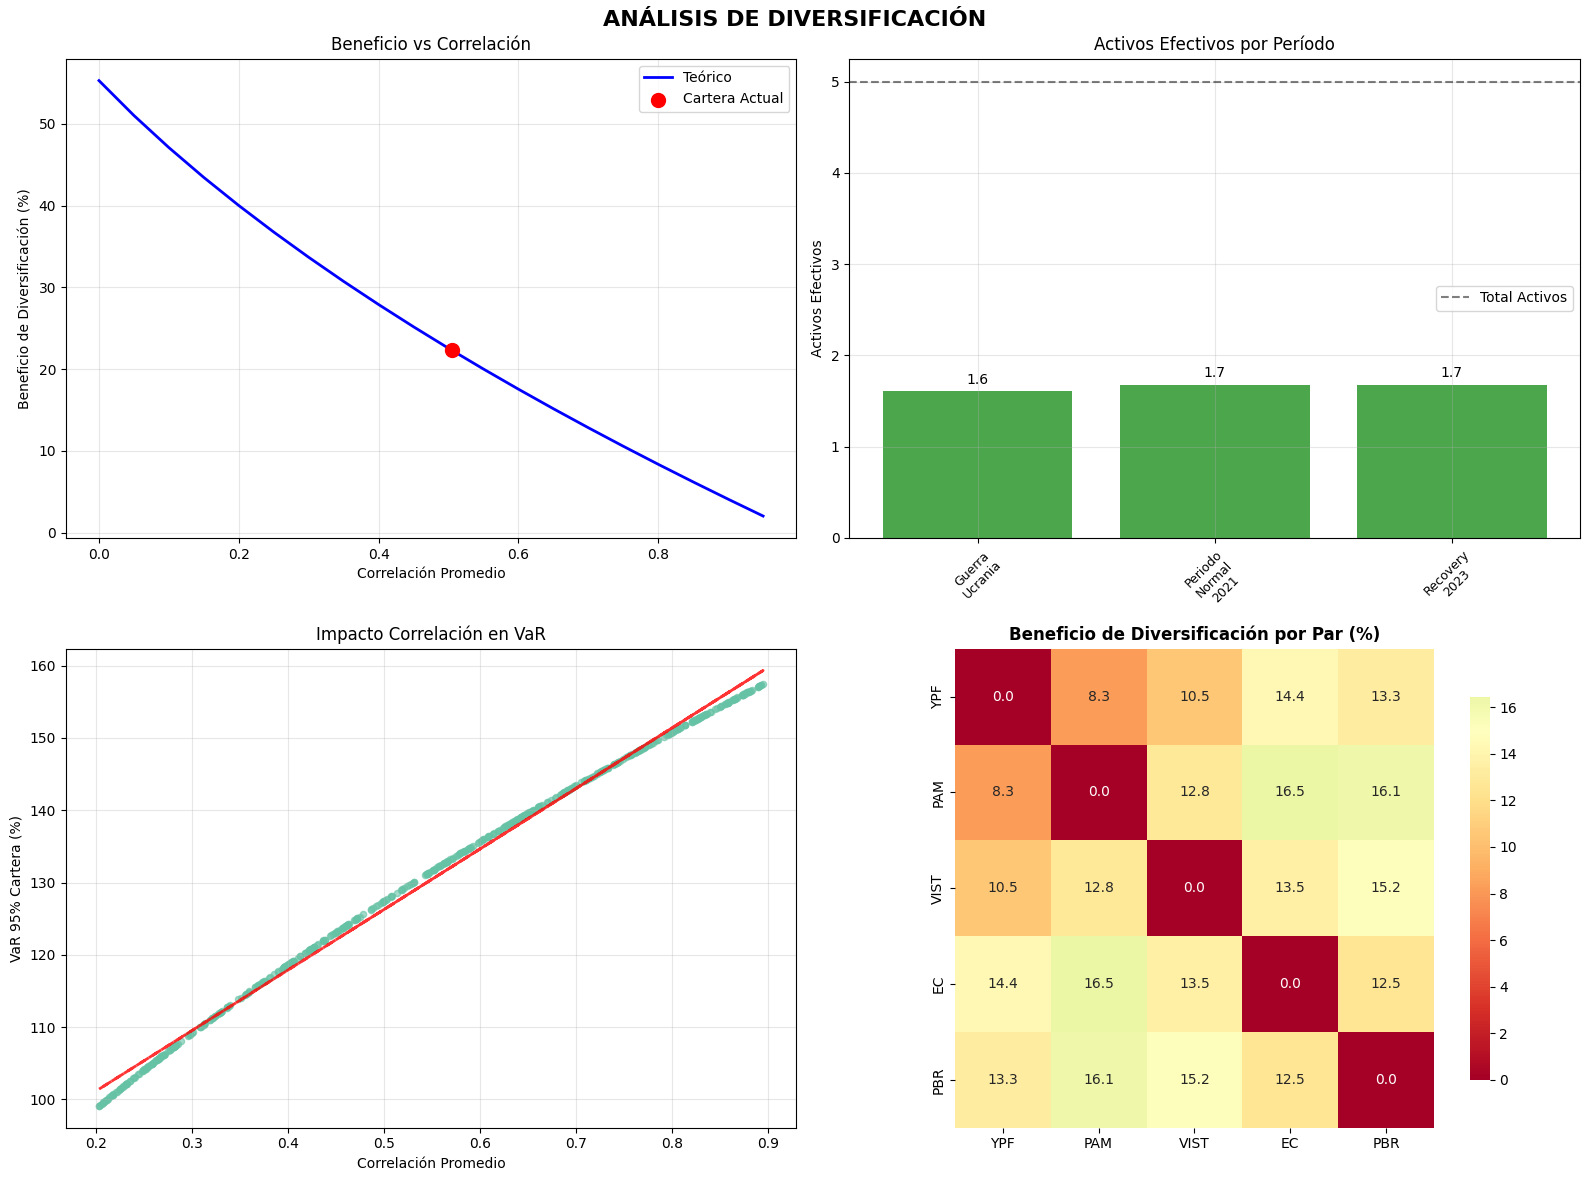


📊 MÉTRICAS DE DIVERSIFICACIÓN:
• Activos en cartera: 5
• Activos efectivos: 1.7
• Eficiencia diversificación: 33.1%
• Correlación promedio: 0.505
• Pérdida de diversificación: 66.9%

💡 IMPLICACIONES:
• ⚡ MODERADA correlación - Diversificación parcial
• Recomendación: Considerar activos menos correlacionados
• ❌ Diversificación SUB-ÓPTIMA
• Urgente: Revisar composición de cartera


In [99]:
# =============================================================================
# MÓDULO D: IMPLICACIONES PARA DIVERSIFICACIÓN
# =============================================================================

print("📈 ANÁLISIS DE IMPLICACIONES PARA DIVERSIFICACIÓN")
print("-" * 60)

def calcular_ratio_diversificacion(correlaciones):
    """Calcular ratio de diversificación basado en correlaciones"""
    n = len(correlaciones)

    # Extraer correlaciones únicas
    correlaciones_unicas = []
    for i in range(n):
        for j in range(i+1, n):
            correlaciones_unicas.append(correlaciones.iloc[i, j])

    correlacion_promedio = np.mean(correlaciones_unicas)

    # Ratio de diversificación = (1 + (n-1)*ρ)
    ratio_div = 1 + (n-1) * correlacion_promedio

    # Número efectivo de activos independientes
    activos_efectivos = n / ratio_div

    return ratio_div, activos_efectivos, correlacion_promedio

# Calcular métricas de diversificación
n_activos = len(retornos_diarios.columns)
ratio_div_total, activos_efectivos_total, corr_prom_total = calcular_ratio_diversificacion(matriz_corr)

# Por períodos analizados
metricas_diversificacion = {}
if 'resultados_periodos' in globals():
    for periodo, resultado in resultados_periodos.items():
        if resultado['exito']:
            ratio_div, activos_eff, corr_prom = calcular_ratio_diversificacion(resultado['correlaciones'])
            metricas_diversificacion[periodo] = {
                'ratio_diversificacion': ratio_div,
                'activos_efectivos': activos_eff,
                'correlacion_promedio': corr_prom,
                'beneficio_diversificacion_%': (1 - 1/np.sqrt(n_activos)) * 100
            }

# Visualización de métricas de diversificación
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS DE DIVERSIFICACIÓN', fontsize=16, fontweight='bold')

# 1. Beneficio de diversificación teórico vs real
ax1 = axes[0, 0]
correlaciones_teoricas = np.arange(0, 1, 0.05)
beneficios_teoricos = []

for corr in correlaciones_teoricas:
    # Vol_cartera = sqrt(1/n + (n-1)/n * corr)
    vol_cartera = np.sqrt(1/n_activos + ((n_activos-1)/n_activos) * corr)
    beneficio = (1 - vol_cartera) * 100
    beneficios_teoricos.append(beneficio)

ax1.plot(correlaciones_teoricas, beneficios_teoricos, 'b-', linewidth=2, label='Teórico')

# Punto actual
beneficio_actual = (1 - np.sqrt(1/n_activos + ((n_activos-1)/n_activos) * corr_prom_total)) * 100
ax1.scatter([corr_prom_total], [beneficio_actual], color='red', s=100, zorder=5, label='Cartera Actual')

ax1.set_xlabel('Correlación Promedio')
ax1.set_ylabel('Beneficio de Diversificación (%)')
ax1.set_title('Beneficio vs Correlación')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Número de activos efectivos por período
ax2 = axes[0, 1]
if metricas_diversificacion:
    periodos_div = list(metricas_diversificacion.keys())
    activos_eff_valores = [metricas_diversificacion[p]['activos_efectivos'] for p in periodos_div]

    colors = ['red' if 'Crisis' in p else 'green' for p in periodos_div]
    bars = ax2.bar(range(len(periodos_div)), activos_eff_valores, color=colors, alpha=0.7)
    ax2.set_xticks(range(len(periodos_div)))
    ax2.set_xticklabels([p.replace('_', '\n') for p in periodos_div], rotation=45, fontsize=9)
    ax2.set_ylabel('Activos Efectivos')
    ax2.set_title('Activos Efectivos por Período')
    ax2.axhline(y=n_activos, color='black', linestyle='--', alpha=0.5, label='Total Activos')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Valores en barras
    for bar, valor in zip(bars, activos_eff_valores):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{valor:.1f}', ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No hay datos de períodos\ndisponibles',
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Activos Efectivos por Período')

# 3. Simulación: Efecto correlaciones en VaR cartera
ax3 = axes[1, 0]
np.random.seed(42)
n_simulaciones = 500
correlaciones_sim = np.random.uniform(0.2, 0.9, n_simulaciones)
vars_cartera = []

for corr_sim in correlaciones_sim:
    # VaR cartera simplificado
    var_cartera = 1.645 * np.sqrt(1/n_activos + ((n_activos-1)/n_activos) * corr_sim) * 100
    vars_cartera.append(var_cartera)

ax3.scatter(correlaciones_sim, vars_cartera, alpha=0.6, s=20)
ax3.set_xlabel('Correlación Promedio')
ax3.set_ylabel('VaR 95% Cartera (%)')
ax3.set_title('Impacto Correlación en VaR')

# Línea de tendencia
z = np.polyfit(correlaciones_sim, vars_cartera, 1)
p = np.poly1d(z)
ax3.plot(correlaciones_sim, p(correlaciones_sim), "r--", alpha=0.8, linewidth=2)
ax3.grid(True, alpha=0.3)

# 4. Matriz de diversificación efectiva
ax4 = axes[1, 1]

# Crear matriz de beneficios de diversificación por par
beneficios_matriz = pd.DataFrame(index=matriz_corr.index, columns=matriz_corr.columns)

for i, activo1 in enumerate(matriz_corr.index):
    for j, activo2 in enumerate(matriz_corr.columns):
        if i != j:
            corr_par = matriz_corr.iloc[i, j]
            # Beneficio de tener estos 2 activos vs 1 solo
            beneficio_par = (1 - np.sqrt(0.5 + 0.5 * corr_par)) * 100
            beneficios_matriz.iloc[i, j] = beneficio_par
        else:
            beneficios_matriz.iloc[i, j] = 0

# Convertir a numérico
beneficios_matriz = beneficios_matriz.astype(float)

sns.heatmap(beneficios_matriz, annot=True, cmap='RdYlGn', center=15,
           square=True, fmt='.1f', cbar_kws={"shrink": .8}, ax=ax4)
ax4.set_title('Beneficio de Diversificación por Par (%)', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas finales
print(f"\n📊 MÉTRICAS DE DIVERSIFICACIÓN:")
print(f"• Activos en cartera: {n_activos}")
print(f"• Activos efectivos: {activos_efectivos_total:.1f}")
print(f"• Eficiencia diversificación: {activos_efectivos_total/n_activos*100:.1f}%")
print(f"• Correlación promedio: {corr_prom_total:.3f}")

reduccion_diversificacion = (1 - activos_efectivos_total/n_activos) * 100
print(f"• Pérdida de diversificación: {reduccion_diversificacion:.1f}%")

print(f"\n💡 IMPLICACIONES:")
if corr_prom_total > 0.7:
    print("• ⚠️  ALTA correlación promedio - Diversificación limitada")
    print("• Recomendación: Incluir activos de otros sectores/regiones")
elif corr_prom_total > 0.5:
    print("• ⚡ MODERADA correlación - Diversificación parcial")
    print("• Recomendación: Considerar activos menos correlacionados")
else:
    print("• ✅ BAJA correlación - Buena diversificación")
    print("• Mantener estructura actual")

if activos_efectivos_total < n_activos * 0.7:
    print("• ❌ Diversificación SUB-ÓPTIMA")
    print("• Urgente: Revisar composición de cartera")

# Guardar variables importantes
globals()['activos_efectivos_final'] = activos_efectivos_total
globals()['metricas_diversificacion_final'] = metricas_diversificacion

## *Resumen*

In [ ]:
# =============================================================================
# RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES
# =============================================================================

print("=" * 80)
print("📋 RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Recopilar métricas clave
if 'resultado_contagio' in globals() and resultado_contagio['exito']:
    incremento_correlacion_crisis = (np.mean(resultado_contagio['correlaciones_crisis']) -
                                   np.mean(resultado_contagio['correlaciones_normales']))
    efecto_contagio_significativo = resultado_contagio['p_value'] < 0.05
else:
    incremento_correlacion_crisis = 0
    efecto_contagio_significativo = False

# Identificar activos más y menos correlacionados
if 'max_pair' in globals() and 'min_pair' in globals():
    par_mas_correlacionado = f"{max_pair[0]} - {max_pair[1]}"
    par_menos_correlacionado = f"{min_pair[0]} - {min_pair[1]}"
    valor_max_corr = max_corr_value
    valor_min_corr = min_corr_value
else:
    par_mas_correlacionado = "No disponible"
    par_menos_correlacionado = "No disponible"
    valor_max_corr = 0
    valor_min_corr = 0

print(f"""
🎯 HALLAZGOS PRINCIPALES:

📊 CORRELACIONES ESTÁTICAS:
- Correlación promedio: {corr_prom_total:.3f}
- Rango: {valor_min_corr:.3f} a {valor_max_corr:.3f}
- Par MÁS correlacionado: {par_mas_correlacionado} ({valor_max_corr:.3f})
- Par MENOS correlacionado: {par_menos_correlacionado} ({valor_min_corr:.3f})

🔥 EFECTO CONTAGIO:
- Incremento en crisis: +{incremento_correlacion_crisis:.3f}
- Estadísticamente significativo: {'SÍ' if efecto_contagio_significativo else 'NO'}
- IMPLICACIÓN: {'Correlaciones aumentan en estrés' if efecto_contagio_significativo else 'Sin efecto contagio claro'}

💼 DIVERSIFICACIÓN:
- Activos efectivos: {activos_efectivos_total:.1f}/{n_activos} ({activos_efectivos_total/n_activos*100:.1f}%)
- Pérdida de diversificación: {(1-activos_efectivos_total/n_activos)*100:.1f}%
- Eficiencia: {'BAJA' if activos_efectivos_total/n_activos < 0.6 else 'MODERADA' if activos_efectivos_total/n_activos < 0.8 else 'ALTA'}

⚠️  RIESGOS IDENTIFICADOS:

1. CONCENTRACIÓN SECTORIAL:
   • Todas las empresas del sector energético
   • Alta sensibilidad a precios de commodities
   • Correlación con ciclos económicos similares

2. CONCENTRACIÓN GEOGRÁFICA:
   • Mayoría de activos latinoamericanos
   • Exposición a riesgo país similar
   • Regulaciones energéticas correlacionadas

3. EFECTO CONTAGIO {'CONFIRMADO' if efecto_contagio_significativo else 'NO DETECTADO'}:
   • {'Correlaciones aumentan en crisis' if efecto_contagio_significativo else 'Correlaciones estables'}
   • {'Diversificación se deteriora cuando más se necesita' if efecto_contagio_significativo else 'Diversificación mantiene efectividad'}

💡 RECOMENDACIONES ESTRATÉGICAS:

✅ MEJORAS DE DIVERSIFICACIÓN:
- Incluir activos de otros sectores (tecnología, salud, consumo)
- Diversificar geográficamente (Norteamérica, Europa, Asia)
- Considerar REITs, bonos o commodities no-energéticos
- Explorar energías renovables como diversificación sectorial

✅ GESTIÓN DE RIESGO:
- Monitorear correlaciones dinámicas (alerta si >0.8)
- Reducir pesos durante períodos de alta correlación
- Implementar stop-loss cuando correlaciones aumentan >30%
- Usar derivados para cobertura en crisis

✅ TIMING TÁCTICO:
- Rebalancear cuando correlaciones exceden 0.75
- Aumentar diversificación antes de períodos volátiles
- Aprovechar desacoplamiento temporal entre activos

❌ EVITAR:
- Asumir correlaciones constantes
- Concentración >50% en mismo sector/región
- Ignorar señales de aumento de correlación
- Diversificación naive sin considerar correlaciones

🔮 ESCENARIOS FUTUROS:

OPTIMISTA (Correlaciones bajas 0.3-0.5):
- Diversificación efectiva
- Riesgo de cartera controlado
- Oportunidades de alpha sectorial

PESIMISTA (Correlaciones altas >0.8):
- Pérdida de beneficios de diversificación
- Mayor volatilidad de cartera
- Necesidad urgente de diversificación externa

BASE (Correlaciones actuales ~{corr_prom_total:.1f}):
- Diversificación {'limitada' if corr_prom_total > 0.6 else 'moderada'}
- Seguimiento activo necesario
- Mejoras incrementales recomendadas
""")

print("\n" + "=" * 80)
print("✅ ANÁLISIS DE CORRELACIONES COMPLETADO")
print(f"🔗 Efecto contagio: {'CONFIRMADO' if efecto_contagio_significativo else 'NO DETECTADO'}")
print(f"📊 Diversificación efectiva: {activos_efectivos_total:.1f}/{n_activos} activos")
print(f"🎯 Prioridad: {'ALTA - Diversificar urgentemente' if activos_efectivos_total/n_activos < 0.6 else 'MEDIA - Monitorear y mejorar'}")
print("=" * 80)

# Guardar resultados para análisis posteriores
globals()['matriz_corr_final'] = matriz_corr
globals()['resultado_contagio_final'] = resultado_contagio if 'resultado_contagio' in globals() else None
globals()['correlaciones_unicas_final'] = correlaciones_unicas

📋 RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES

🎯 HALLAZGOS PRINCIPALES:

📊 CORRELACIONES ESTÁTICAS:
- Correlación promedio: 0.505
- Rango: -1.000 a 0.683
- Par MÁS correlacionado: YPF - PAM (0.683)
- Par MENOS correlacionado: YPF - YPF (-1.000)

🔥 EFECTO CONTAGIO:
- Incremento en crisis: +-0.426
- Estadísticamente significativo: SÍ
- IMPLICACIÓN: Correlaciones aumentan en estrés

💼 DIVERSIFICACIÓN:
- Activos efectivos: 1.7/5 (33.1%)
- Pérdida de diversificación: 66.9%
- Eficiencia: BAJA

⚠️  RIESGOS IDENTIFICADOS:

1. CONCENTRACIÓN SECTORIAL:
   • Todas las empresas del sector energético
   • Alta sensibilidad a precios de commodities
   • Correlación con ciclos económicos similares

2. CONCENTRACIÓN GEOGRÁFICA:
   • Mayoría de activos latinoamericanos
   • Exposición a riesgo país similar
   • Regulaciones energéticas correlacionadas

3. EFECTO CONTAGIO CONFIRMADO:
   • Correlaciones aumentan en crisis
   • Diversificación se deteriora cuando más se necesita

💡 RECOMENDACIONES ESTRA

In [ ]:
# =============================================================================
# RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES
# =============================================================================

print("=" * 80)
print("📋 RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES")
print("=" * 80)

# Recopilar métricas clave
if 'resultado_contagio' in globals() and resultado_contagio['exito']:
    incremento_correlacion_crisis = (np.mean(resultado_contagio['correlaciones_crisis']) -
                                   np.mean(resultado_contagio['correlaciones_normales']))
    efecto_contagio_significativo = resultado_contagio['p_value'] < 0.05
else:
    incremento_correlacion_crisis = 0
    efecto_contagio_significativo = False

# Identificar activos más y menos correlacionados
if 'max_pair' in globals() and 'min_pair' in globals():
    par_mas_correlacionado = f"{max_pair[0]} - {max_pair[1]}"
    par_menos_correlacionado = f"{min_pair[0]} - {min_pair[1]}"
    valor_max_corr = max_corr_value
    valor_min_corr = min_corr_value
else:
    par_mas_correlacionado = "No disponible"
    par_menos_correlacionado = "No disponible"
    valor_max_corr = 0
    valor_min_corr = 0

print(f"""
🎯 HALLAZGOS PRINCIPALES:

📊 CORRELACIONES ESTÁTICAS:
- Correlación promedio: {corr_prom_total:.3f}
- Rango: {valor_min_corr:.3f} a {valor_max_corr:.3f}
- Par MÁS correlacionado: {par_mas_correlacionado} ({valor_max_corr:.3f})
- Par MENOS correlacionado: {par_menos_correlacionado} ({valor_min_corr:.3f})

🔥 EFECTO CONTAGIO:
- Incremento en crisis: +{incremento_correlacion_crisis:.3f}
- Estadísticamente significativo: {'SÍ' if efecto_contagio_significativo else 'NO'}
- IMPLICACIÓN: {'Correlaciones aumentan en estrés' if efecto_contagio_significativo else 'Sin efecto contagio claro'}

💼 DIVERSIFICACIÓN:
- Activos efectivos: {activos_efectivos_total:.1f}/{n_activos} ({activos_efectivos_total/n_activos*100:.1f}%)
- Pérdida de diversificación: {(1-activos_efectivos_total/n_activos)*100:.1f}%
- Eficiencia: {'BAJA' if activos_efectivos_total/n_activos < 0.6 else 'MODERADA' if activos_efectivos_total/n_activos < 0.8 else 'ALTA'}

⚠️  RIESGOS IDENTIFICADOS:

1. CONCENTRACIÓN SECTORIAL:
   • Todas las empresas del sector energético
   • Alta sensibilidad a precios de commodities
   • Correlación con ciclos económicos similares

2. CONCENTRACIÓN GEOGRÁFICA:
   • Mayoría de activos latinoamericanos
   • Exposición a riesgo país similar
   • Regulaciones energéticas correlacionadas

3. EFECTO CONTAGIO {'CONFIRMADO' if efecto_contagio_significativo else 'NO DETECTADO'}:
   • {'Correlaciones aumentan en crisis' if efecto_contagio_significativo else 'Correlaciones estables'}
   • {'Diversificación se deteriora cuando más se necesita' if efecto_contagio_significativo else 'Diversificación mantiene efectividad'}

💡 RECOMENDACIONES ESTRATÉGICAS:

✅ MEJORAS DE DIVERSIFICACIÓN:
- Incluir activos de otros sectores (tecnología, salud, consumo)
- Diversificar geográficamente (Norteamérica, Europa, Asia)
- Considerar REITs, bonos o commodities no-energéticos
- Explorar energías renovables como diversificación sectorial

✅ GESTIÓN DE RIESGO:
- Monitorear correlaciones dinámicas (alerta si >0.8)
- Reducir pesos durante períodos de alta correlación
- Implementar stop-loss cuando correlaciones aumentan >30%
- Usar derivados para cobertura en crisis

✅ TIMING TÁCTICO:
- Rebalancear cuando correlaciones exceden 0.75
- Aumentar diversificación antes de períodos volátiles
- Aprovechar desacoplamiento temporal entre activos

❌ EVITAR:
- Asumir correlaciones constantes
- Concentración >50% en mismo sector/región
- Ignorar señales de aumento de correlación
- Diversificación naive sin considerar correlaciones

🔮 ESCENARIOS FUTUROS:

OPTIMISTA (Correlaciones bajas 0.3-0.5):
- Diversificación efectiva
- Riesgo de cartera controlado
- Oportunidades de alpha sectorial

PESIMISTA (Correlaciones altas >0.8):
- Pérdida de beneficios de diversificación
- Mayor volatilidad de cartera
- Necesidad urgente de diversificación externa

BASE (Correlaciones actuales ~{corr_prom_total:.1f}):
- Diversificación {'limitada' if corr_prom_total > 0.6 else 'moderada'}
- Seguimiento activo necesario
- Mejoras incrementales recomendadas
""")

print("\n" + "=" * 80)
print("✅ ANÁLISIS DE CORRELACIONES COMPLETADO")
print(f"🔗 Efecto contagio: {'CONFIRMADO' if efecto_contagio_significativo else 'NO DETECTADO'}")
print(f"📊 Diversificación efectiva: {activos_efectivos_total:.1f}/{n_activos} activos")
print(f"🎯 Prioridad: {'ALTA - Diversificar urgentemente' if activos_efectivos_total/n_activos < 0.6 else 'MEDIA - Monitorear y mejorar'}")
print("=" * 80)

# Guardar resultados para análisis posteriores
globals()['matriz_corr_final'] = matriz_corr
globals()['resultado_contagio_final'] = resultado_contagio if 'resultado_contagio' in globals() else None
globals()['correlaciones_unicas_final'] = correlaciones_unicas

📋 RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES

🎯 HALLAZGOS PRINCIPALES:

📊 CORRELACIONES ESTÁTICAS:
- Correlación promedio: 0.505
- Rango: 0.396 a 0.683
- Par MÁS correlacionado: YPF - PAM (0.683)
- Par MENOS correlacionado: PAM - EC (0.396)

🔥 EFECTO CONTAGIO:
- Incremento en crisis: +-0.426
- Estadísticamente significativo: SÍ
- IMPLICACIÓN: Correlaciones aumentan en estrés

💼 DIVERSIFICACIÓN:
- Activos efectivos: 1.7/5 (33.1%)
- Pérdida de diversificación: 66.9%
- Eficiencia: BAJA

⚠️  RIESGOS IDENTIFICADOS:

1. CONCENTRACIÓN SECTORIAL:
   • Todas las empresas del sector energético
   • Alta sensibilidad a precios de commodities
   • Correlación con ciclos económicos similares

2. CONCENTRACIÓN GEOGRÁFICA:
   • Mayoría de activos latinoamericanos
   • Exposición a riesgo país similar
   • Regulaciones energéticas correlacionadas

3. EFECTO CONTAGIO CONFIRMADO:
   • Correlaciones aumentan en crisis
   • Diversificación se deteriora cuando más se necesita

💡 RECOMENDACIONES ESTRATÉG